In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from numpy import *
from scipy import stats
from pandas.plotting import scatter_matrix
import sklearn
import warnings

In [2]:
data = pd.read_excel(r'Attrition Data Exercise.xlsx')

In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'Educ_bucket', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'EnvironmentSatisfaction_Bucket', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobInvolvement_bucket', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'JobSatisfaction_bucket', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'RelationshipSatisfaction_bucket',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'WorkLifeBalance_bucket',
       'Company Tenure (yrs)', 'Company Tenure (yrs)_Bucket',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Location'],
      dtype='object')

In [4]:
data.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education    Educ_bucket EducationField  EmployeeCount  \
0                 1          2        College  Life Sciences              1   
1                 8          1  Below College  Life Sciences              1   
2                 2          2        College          Other              1   
3                 3          4        Masters  Life Sciences              1   
4                 2          1  Below College        Medical              1   

   ...  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0  ...                  8                      0               1   
1  ...                 10                      3               3   
2  ...                  7                      3               3   
3  ...                  8                      3               3   
4  ...                  6                      3               3   

  WorkLifeBalance_bucket  Company Tenure (yrs)  Company Tenure (yrs)_Bucket  \
0                    Bad                     6                5 to 10 years   
1                 Better                    10                 10 to 15 yrs   
2                 Better                     0            Less than 2 years   
3                 Better                     8                5 to 10 years   
4                 Better                     2                   3 to 5 yrs   

  YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  Location  
0                  4                        0                    5     India  
1                  7                        1                    7     China  
2                  0                        0                    0     India  
3                  7                        3                    0     India  
4                  2                        2                    2     India  

[5 rows x 43 columns]

# Data Preprocessing

## Rounding of some of the columns to make easier and larger buckets for better analysis

In [5]:
data.DailyRate = data.DailyRate.round(-2)
data.HourlyRate = data.HourlyRate.round(-1)
data.MonthlyIncome = data.MonthlyIncome.round(-3)
data.MonthlyRate = data.MonthlyRate.round(-3)
data.Age = data.Age.round(-1)

In [6]:
data_original = data

## Replace Yes and No with 1 and 0 for attrition variable

In [7]:
Num_val = {'Yes':1, 'No':0}
data['Attrition'] = data["Attrition"].apply(lambda x: Num_val[x])

In [8]:
data.iloc[:, 30 : 40]

RelationshipSatisfaction_bucket  StandardHours  StockOptionLevel  \
0                                Low             80                 0   
1                          Very high             80                 1   
2                             Medium             80                 0   
3                               High             80                 0   
4                          Very high             80                 1   
...                              ...            ...               ...   
1465                            High             80                 1   
1466                             Low             80                 1   
1467                          Medium             80                 1   
1468                       Very high             80                 0   
1469                             Low             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

     WorkLifeBalance_bucket  Company Tenure (yrs) Company Tenure (yrs)_Bucket  \
0                       Bad                     6               5 to 10 years   
1                    Better                    10                10 to 15 yrs   
2                    Better                     0           Less than 2 years   
3                    Better                     8               5 to 10 years   
4                    Better                     2                  3 to 5 yrs   
...                     ...                   ...                         ...   
1465                 Better                     5               5 to 10 years   
1466                 Better                     7               5 to 10 years   
1467                 Better                     6               5 to 10 years   
1468                   Good                     9               5 to 10 years   
1469                   Best                     4                  3 to 5 yrs   

      YearsInCurrentRole  
0                      4  
1                      7  
2                      0  
3                      7  
4                      2  
...                  ...  
1465                   2  
1466                   7  
1467                   2  
1468                   6  
1469                   3  

[1470 rows x 10 columns]

## Getting stats of the features. Droppping features with 0 variance, features which are irrelevant like Employee Number and Dropping Categorical Columns which already have Numerical Ordered Values which can be used like Educ_bucket

In [9]:
data.describe()

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     37.061224     0.161224   801.836735          9.192517     2.912925   
std       9.667885     0.367863   406.000802          8.106864     1.024165   
min      20.000000     0.000000   100.000000          1.000000     1.000000   
25%      30.000000     0.000000   500.000000          2.000000     2.000000   
50%      40.000000     0.000000   800.000000          7.000000     3.000000   
75%      40.000000     0.000000  1200.000000         14.000000     4.000000   
max      60.000000     1.000000  1500.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.986395   
std              0.0      602.024335                 1.093082    20.796262   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      491.250000                 2.000000    50.000000   
50%              1.0     1020.500000                 3.000000    70.000000   
75%              1.0     1555.750000                 4.000000    80.000000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement  ...  RelationshipSatisfaction  StandardHours  \
count     1470.000000  ...               1470.000000         1470.0   
mean         2.729932  ...                  2.712245           80.0   
std          0.711561  ...                  1.081209            0.0   
min          1.000000  ...                  1.000000           80.0   
25%          2.000000  ...                  2.000000           80.0   
50%          3.000000  ...                  3.000000           80.0   
75%          3.000000  ...                  4.000000           80.0   
max          4.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  Company Tenure (yrs)  YearsInCurrentRole  \
count      1470.000000           1470.000000         1470.000000   
mean          2.761224              7.008163            4.229252   
std           0.706476              6.126525            3.623137   
min           1.000000              0.000000            0.000000   
25%           2.000000              3.000000            2.000000   
50%           3.000000              5.000000            3.000000   
75%           3.000000              9.000000            7.000000   
max           4.000000             40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 27 columns]

In [10]:
threshold = 0.0

data = data.drop(data.std()[data.std() == threshold].index.values, axis=1)
data = data.drop('EmployeeNumber', axis = 1)
data = data.drop(['Educ_bucket', 'EnvironmentSatisfaction_Bucket', 'JobInvolvement_bucket', 'JobSatisfaction_bucket', 'RelationshipSatisfaction_bucket', 'WorkLifeBalance_bucket', 'Company Tenure (yrs)_Bucket'], axis = 1)


In [11]:
data_new = data

# Correlation Matrix : Could have removed highly correlated variables if model performance had to be improved more

In [12]:
fig, ax=plt.subplots(figsize=(200,200))
plt.title('Correaltion Plot',fontsize=50)
sns.heatmap(data.corr(), mask=np.zeros_like(data.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True,linewidths=3)
plt.xticks(rotation=90, fontsize=100)
plt.yticks(rotation=0, fontsize=100)
plt.show()

## Getting target variable in Y and rest of the features in X

In [13]:
Y = data.Attrition

In [14]:
Y.shape

(1470,)

In [15]:
X = data.drop('Attrition', axis = 1)

In [16]:
X.iloc[:, 20 : 50]

PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                    11                  3                         1   
1                    23                  4                         4   
2                    15                  3                         2   
3                    11                  3                         3   
4                    12                  3                         4   
...                 ...                ...                       ...   
1465                 17                  3                         3   
1466                 15                  3                         1   
1467                 20                  4                         2   
1468                 14                  3                         4   
1469                 12                  3                         1   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

      WorkLifeBalance  Company Tenure (yrs)  YearsInCurrentRole  \
0                   1                     6                   4   
1                   3                    10                   7   
2                   3                     0                   0   
3                   3                     8                   7   
4                   3                     2                   2   
...               ...                   ...                 ...   
1465                3                     5                   2   
1466                3                     7                   7   
1467                3                     6                   2   
1468                2                     9                   6   
1469                4                     4                   3   

      YearsSinceLastPromotion  YearsWithCurrManager Location  
0                           0                     5    India  
1                           1                     7    China  
2                           0                     0    India  
3                           3                     0    India  
4                           2                     2    India  
...                       ...                   ...      ...  
1465                        0                     3      USA  
1466                        1                     7      USA  
1467                        0                     3      USA  
1468                        0                     8      USA  
1469                        1                     2      USA  

[1470 rows x 12 columns]

## Using OneHotEncoding for non ordered Categorical Features, OrdinalEncoding for ordered Categorical Features and StandardScaler to scale all numerical features

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

In [18]:
X.iloc[:, 0 : 20]

Age     BusinessTravel  DailyRate              Department  \
0      40      Travel_Rarely       1100                   Sales   
1      50  Travel_Frequently        300  Research & Development   
2      40      Travel_Rarely       1400  Research & Development   
3      30  Travel_Frequently       1400  Research & Development   
4      30      Travel_Rarely        600  Research & Development   
...   ...                ...        ...                     ...   
1465   40  Travel_Frequently        900  Research & Development   
1466   40      Travel_Rarely        600  Research & Development   
1467   30      Travel_Rarely        200  Research & Development   
1468   50  Travel_Frequently       1000                   Sales   
1469   30      Travel_Rarely        600  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          90               3         2            Sales Executive   
1       Male          60               2         2         Research Scientist   
2       Male          90               2         1      Laboratory Technician   
3     Female          60               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          40               4         2      Laboratory Technician   
1466    Male          40               2         3  Healthcare Representative   
1467    Male          90               4         2     Manufacturing Director   
1468    Male          60               2         2            Sales Executive   
1469    Male          80               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           6000        19000   
1                   2       Married           5000        25000   
2                   3        Single           2000         2000   
3                   3       Married           3000        23000   
4                   2       Married           3000        17000   
...               ...           ...            ...          ...   
1465                4       Married           3000        12000   
1466                1       Married          10000        21000   
1467                2       Married           6000         5000   
1468                2       Married           5000        13000   
1469                3       Married           4000        10000   

      NumCompaniesWorked Over18 OverTime  
0                      8      Y      Yes  
1                      1      Y       No  
2                      6      Y      Yes  
3                      1      Y      Yes  
4                      9      Y       No  
...                  ...    ...      ...  
1465                   4      Y       No  
1466                   4      Y       No  
1467                   1      Y      Yes  
1468                   2      Y       No  
1469                   2 

In [19]:
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns

In [20]:
numerical_ix

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'Company Tenure (yrs)', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [21]:
column_trans = make_column_transformer(
(OneHotEncoder(), ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Location']),
(OrdinalEncoder(), ['BusinessTravel']),
(StandardScaler(), ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'Company Tenure (yrs)', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']),    
remainder = 'passthrough')

In [22]:
X_new  = column_trans.fit_transform(X)

In [23]:
column_trans.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['Department', 'EducationField', 'Gender',
                                  'JobRole', 'MaritalStatus', 'Over18',
                                  'OverTime', 'Location']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['BusinessTravel']),
                                ('standardscaler', StandardScaler(),
                                 ['Age', 'DailyRate', 'DistanceFromHome',
                                  'Education', 'EnvironmentSatisfacti...
                                  'HourlyRate', 'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction', 'MonthlyIncome',
                                  'MonthlyRate', 'NumCompaniesWorked',
                                  'PercentSalaryHike', 'PerformanceRati

In [24]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [25]:
feat_names = get_feature_names(column_trans)

<ipython-input-24-aeb52d502674>:30: UserWarning: Transformer ordinalencoder (type OrdinalEncoder) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-24-aeb52d502674>:30: UserWarning: Transformer standardscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [26]:
X_new.shape

(1470, 53)

In [27]:
X_new

array([[ 0.        ,  0.        ,  1.        , ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 0.        ,  1.        ,  0.        , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.        ,  1.        ,  0.        , ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 0.        ,  0.        ,  1.        , ...,  0.48889978,
        -0.67914568,  1.08689522],
       [ 0.        ,  1.        ,  0.        , ..., -0.33939374,
        -0.36871529, -0.59522723]])

# Modelling

## Splitting into Train and Test Sets

In [28]:
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.20,random_state=200)

In [29]:
X_train.shape

(1176, 53)

In [30]:
X_test.shape

(294, 53)

In [31]:
Y_train.shape

(1176,)

In [32]:
Y_test.shape

(294,)

## Running Logistic Regression Model for benchmark

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, penalty='l2', max_iter = 500)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8741496598639455


## Running Random Forest Model with best Hyperparameters
## Using Grid Search CV for Hyperparameter Tuning and Stratified Cross Validation for better sampling

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 250, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}
,
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 9, n_jobs = -1, verbose = 2)



grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 9 folds for each of 108 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:  1.2min finished


{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 100}

In [35]:
model = grid_search.best_estimator_
Y_pred = model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8809523809523809


## Checking for Recall for the model as we are most concerned with not classifying churners as non churners

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
cr = classification_report(Y_test,Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       253
           1       1.00      0.15      0.26        41

    accuracy                           0.88       294
   macro avg       0.94      0.57      0.60       294
weighted avg       0.90      0.88      0.84       294



In [40]:
recall = metrics.recall_score(Y_test, Y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.146


In [902]:
model

RandomForestClassifier(max_depth=10, n_estimators=250)

In [903]:
model.feature_importances_

array([0.00276199, 0.00872382, 0.00971095, 0.00318348, 0.00749233,
       0.00745929, 0.00971985, 0.0023605 , 0.00796265, 0.0069103 ,
       0.0076735 , 0.00227082, 0.00349829, 0.01162021, 0.00146143,
       0.00240517, 0.00063344, 0.0073828 , 0.00670315, 0.00952692,
       0.00736391, 0.0085661 , 0.01809692, 0.        , 0.04029849,
       0.03971613, 0.00635151, 0.00818799, 0.00772115, 0.01294218,
       0.03325798, 0.03556215, 0.04849996, 0.02047774, 0.03176444,
       0.03115271, 0.0221354 , 0.02298059, 0.02997191, 0.04558261,
       0.03918754, 0.03199632, 0.0325047 , 0.00610841, 0.02206076,
       0.03054476, 0.06272628, 0.02560096, 0.02441481, 0.04889998,
       0.03100731, 0.02487155, 0.02998584])

In [904]:
feat_names

['onehotencoder__x0_Human Resources',
 'onehotencoder__x0_Research & Development',
 'onehotencoder__x0_Sales',
 'onehotencoder__x1_Human Resources',
 'onehotencoder__x1_Life Sciences',
 'onehotencoder__x1_Marketing',
 'onehotencoder__x1_Medical',
 'onehotencoder__x1_Other',
 'onehotencoder__x1_Technical Degree',
 'onehotencoder__x2_Female',
 'onehotencoder__x2_Male',
 'onehotencoder__x3_Healthcare Representative',
 'onehotencoder__x3_Human Resources',
 'onehotencoder__x3_Laboratory Technician',
 'onehotencoder__x3_Manager',
 'onehotencoder__x3_Manufacturing Director',
 'onehotencoder__x3_Research Director',
 'onehotencoder__x3_Research Scientist',
 'onehotencoder__x3_Sales Executive',
 'onehotencoder__x3_Sales Representative',
 'onehotencoder__x4_Divorced',
 'onehotencoder__x4_Married',
 'onehotencoder__x4_Single',
 'onehotencoder__x5_Y',
 'onehotencoder__x6_No',
 'onehotencoder__x6_Yes',
 'onehotencoder__x7_China',
 'onehotencoder__x7_India',
 'onehotencoder__x7_USA',
 'ordinalencoder

## Creating dictionary of features and their importance to find out top 3 contributing features

In [905]:
dictionary = dict(zip(feat_names, model.feature_importances_))

In [906]:
my_keys = sorted(dictionary, key=dictionary.get, reverse=True)[:3]

In [907]:
my_keys

['standardscaler__TotalWorkingYears',
 'standardscaler__Company Tenure (yrs)',
 'standardscaler__DistanceFromHome']

# Data Analysis

In [908]:
data_new.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'Company Tenure (yrs)',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Location'],
      dtype='object')

In [909]:
features1 = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department']
features2 = ['DistanceFromHome', 'Educ_bucket', 'EducationField'] 
features3 = ['WorkLifeBalance_bucket', 'Company Tenure (yrs)', 'YearsInCurrentRole', 'YearsSinceLastPromotion']
features4 = [ 'JobLevel', 'JobRole', 'JobSatisfaction_bucket', 'MaritalStatus']
features5 = ['MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18']
features6 = ['OverTime', 'PercentSalaryHike', 'PerformanceRating'] 
features7 = ['RelationshipSatisfaction_bucket', 'StockOptionLevel', 'TotalWorkingYears']
features8 = ['TrainingTimesLastYear', 'WorkLifeBalance_bucket', 'Company Tenure (yrs)_Bucket']
features9 = ['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Location']
features10 = ['EnvironmentSatisfaction_Bucket', 'JobInvolvement_bucket']

In [910]:
data_new

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      40          1      Travel_Rarely       1100                   Sales   
1      50          0  Travel_Frequently        300  Research & Development   
2      40          1      Travel_Rarely       1400  Research & Development   
3      30          0  Travel_Frequently       1400  Research & Development   
4      30          0      Travel_Rarely        600  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   40          0  Travel_Frequently        900  Research & Development   
1466   40          0      Travel_Rarely        600  Research & Development   
1467   30          0      Travel_Rarely        200  Research & Development   
1468   50          0  Travel_Frequently       1000                   Sales   
1469   30          0      Travel_Rarely        600  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  RelationshipSatisfaction  StockOptionLevel  \
0     Female  ...                         1                 0   
1       Male  ...                         4                 1   
2       Male  ...                         2                 0   
3     Female  ...                         3                 0   
4       Male  ...                         4                 1   
...      ...  ...                       ...               ...   
1465    Male  ...                         3                 1   
1466    Male  ...                         1                 1   
1467    Male  ...                         2                 1   
1468    Male  ...                         4                 0   
1469    Male  ...                         1                 0   

      TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                     8                     0                1   
1                    10                     3                3   
2                     7                     3                3   
3                     8                     3                3   
4                     6                     3                3   
...                 ...                   ...              ...   
1465                 17                     3                3   
1466                  9                     5                3   
1467                  6                     0                3   
1468                 17                     3                2   
1469                  6                     3                4   

     Company Tenure (yrs)  YearsInCurrentRole  YearsSinceLastPromotion  \
0                       6                   4                        0   
1                      10                   7                        1   
2                       0                   0                        0   
3                       8                   7                        3   
4                       2                   2                        2   
...                   ...                 ...                      ...   
1465                    5                   2       

## Grouping by 'Attrition' column and seeing how behavior changes with different values for different features

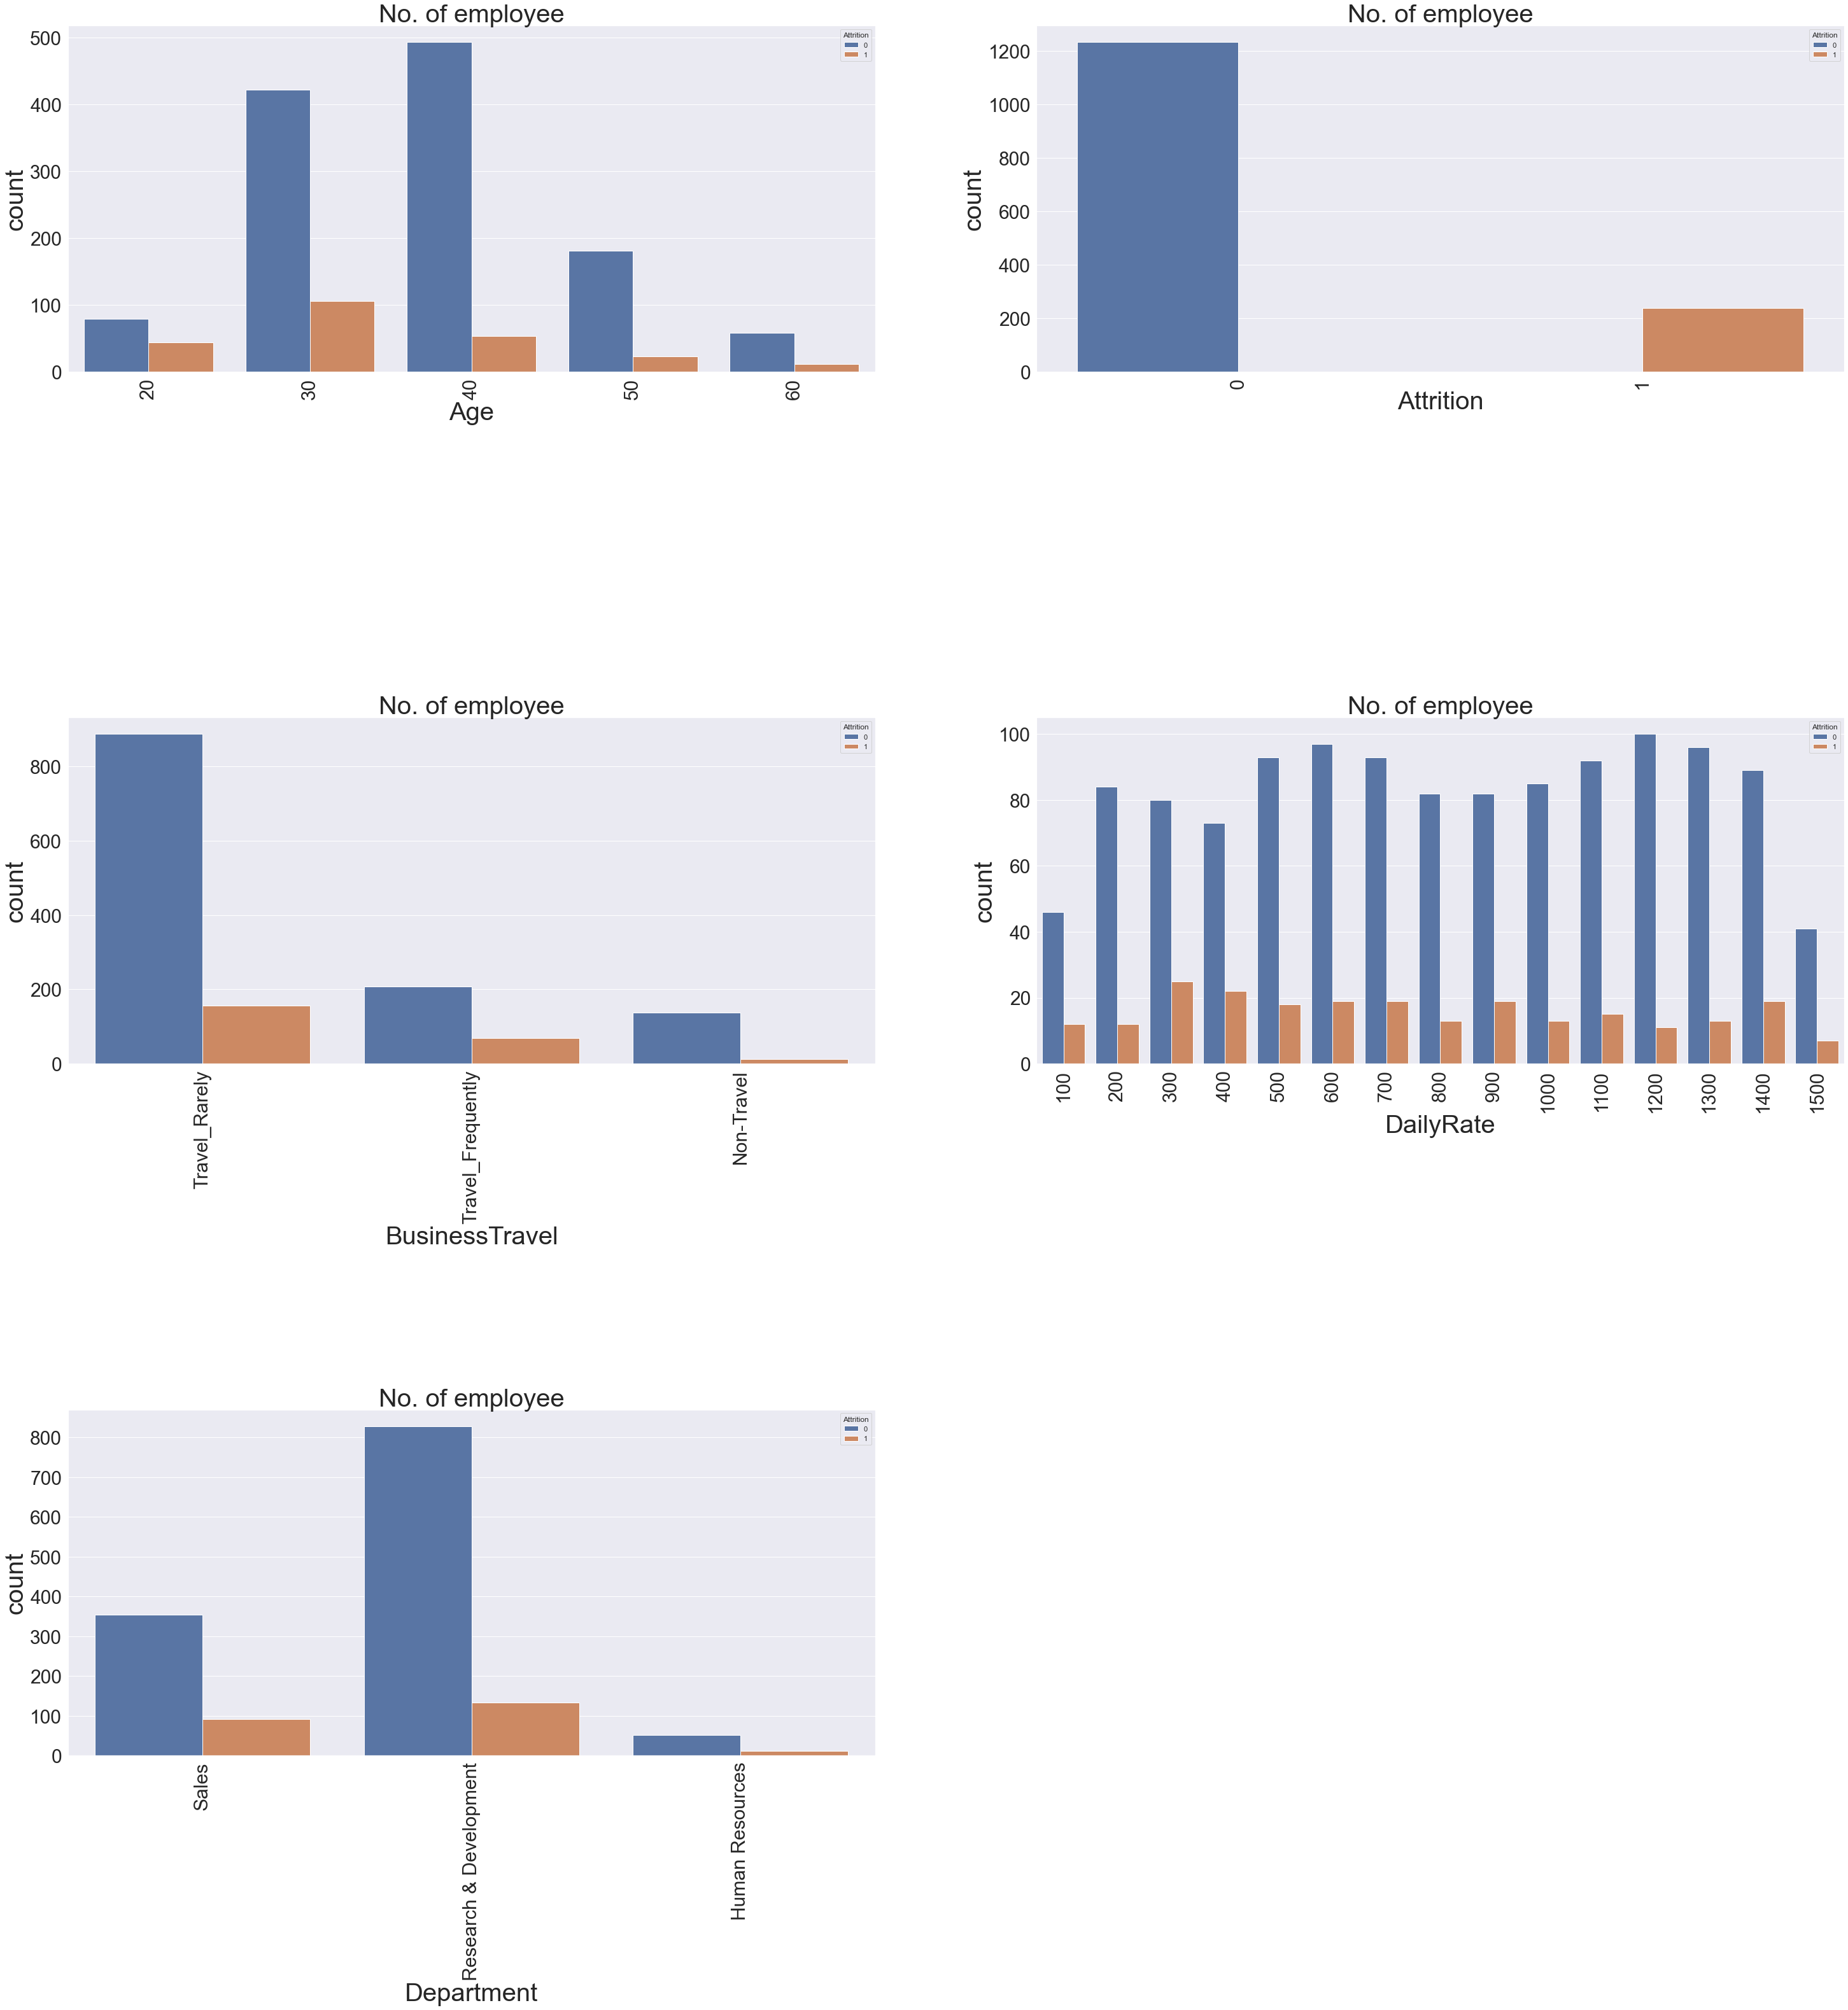

In [921]:
fig=plt.subplots(figsize=(50,50))
for i, j in enumerate(features1):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data_original, hue='Attrition')
    plt.xticks(rotation=90, fontsize = 30)
    plt.yticks(rotation=00, fontsize = 30)
    plt.xlabel(j, fontsize=40)
    plt.ylabel('count', fontsize=40)
    plt.title("No. of employee", fontsize=40)

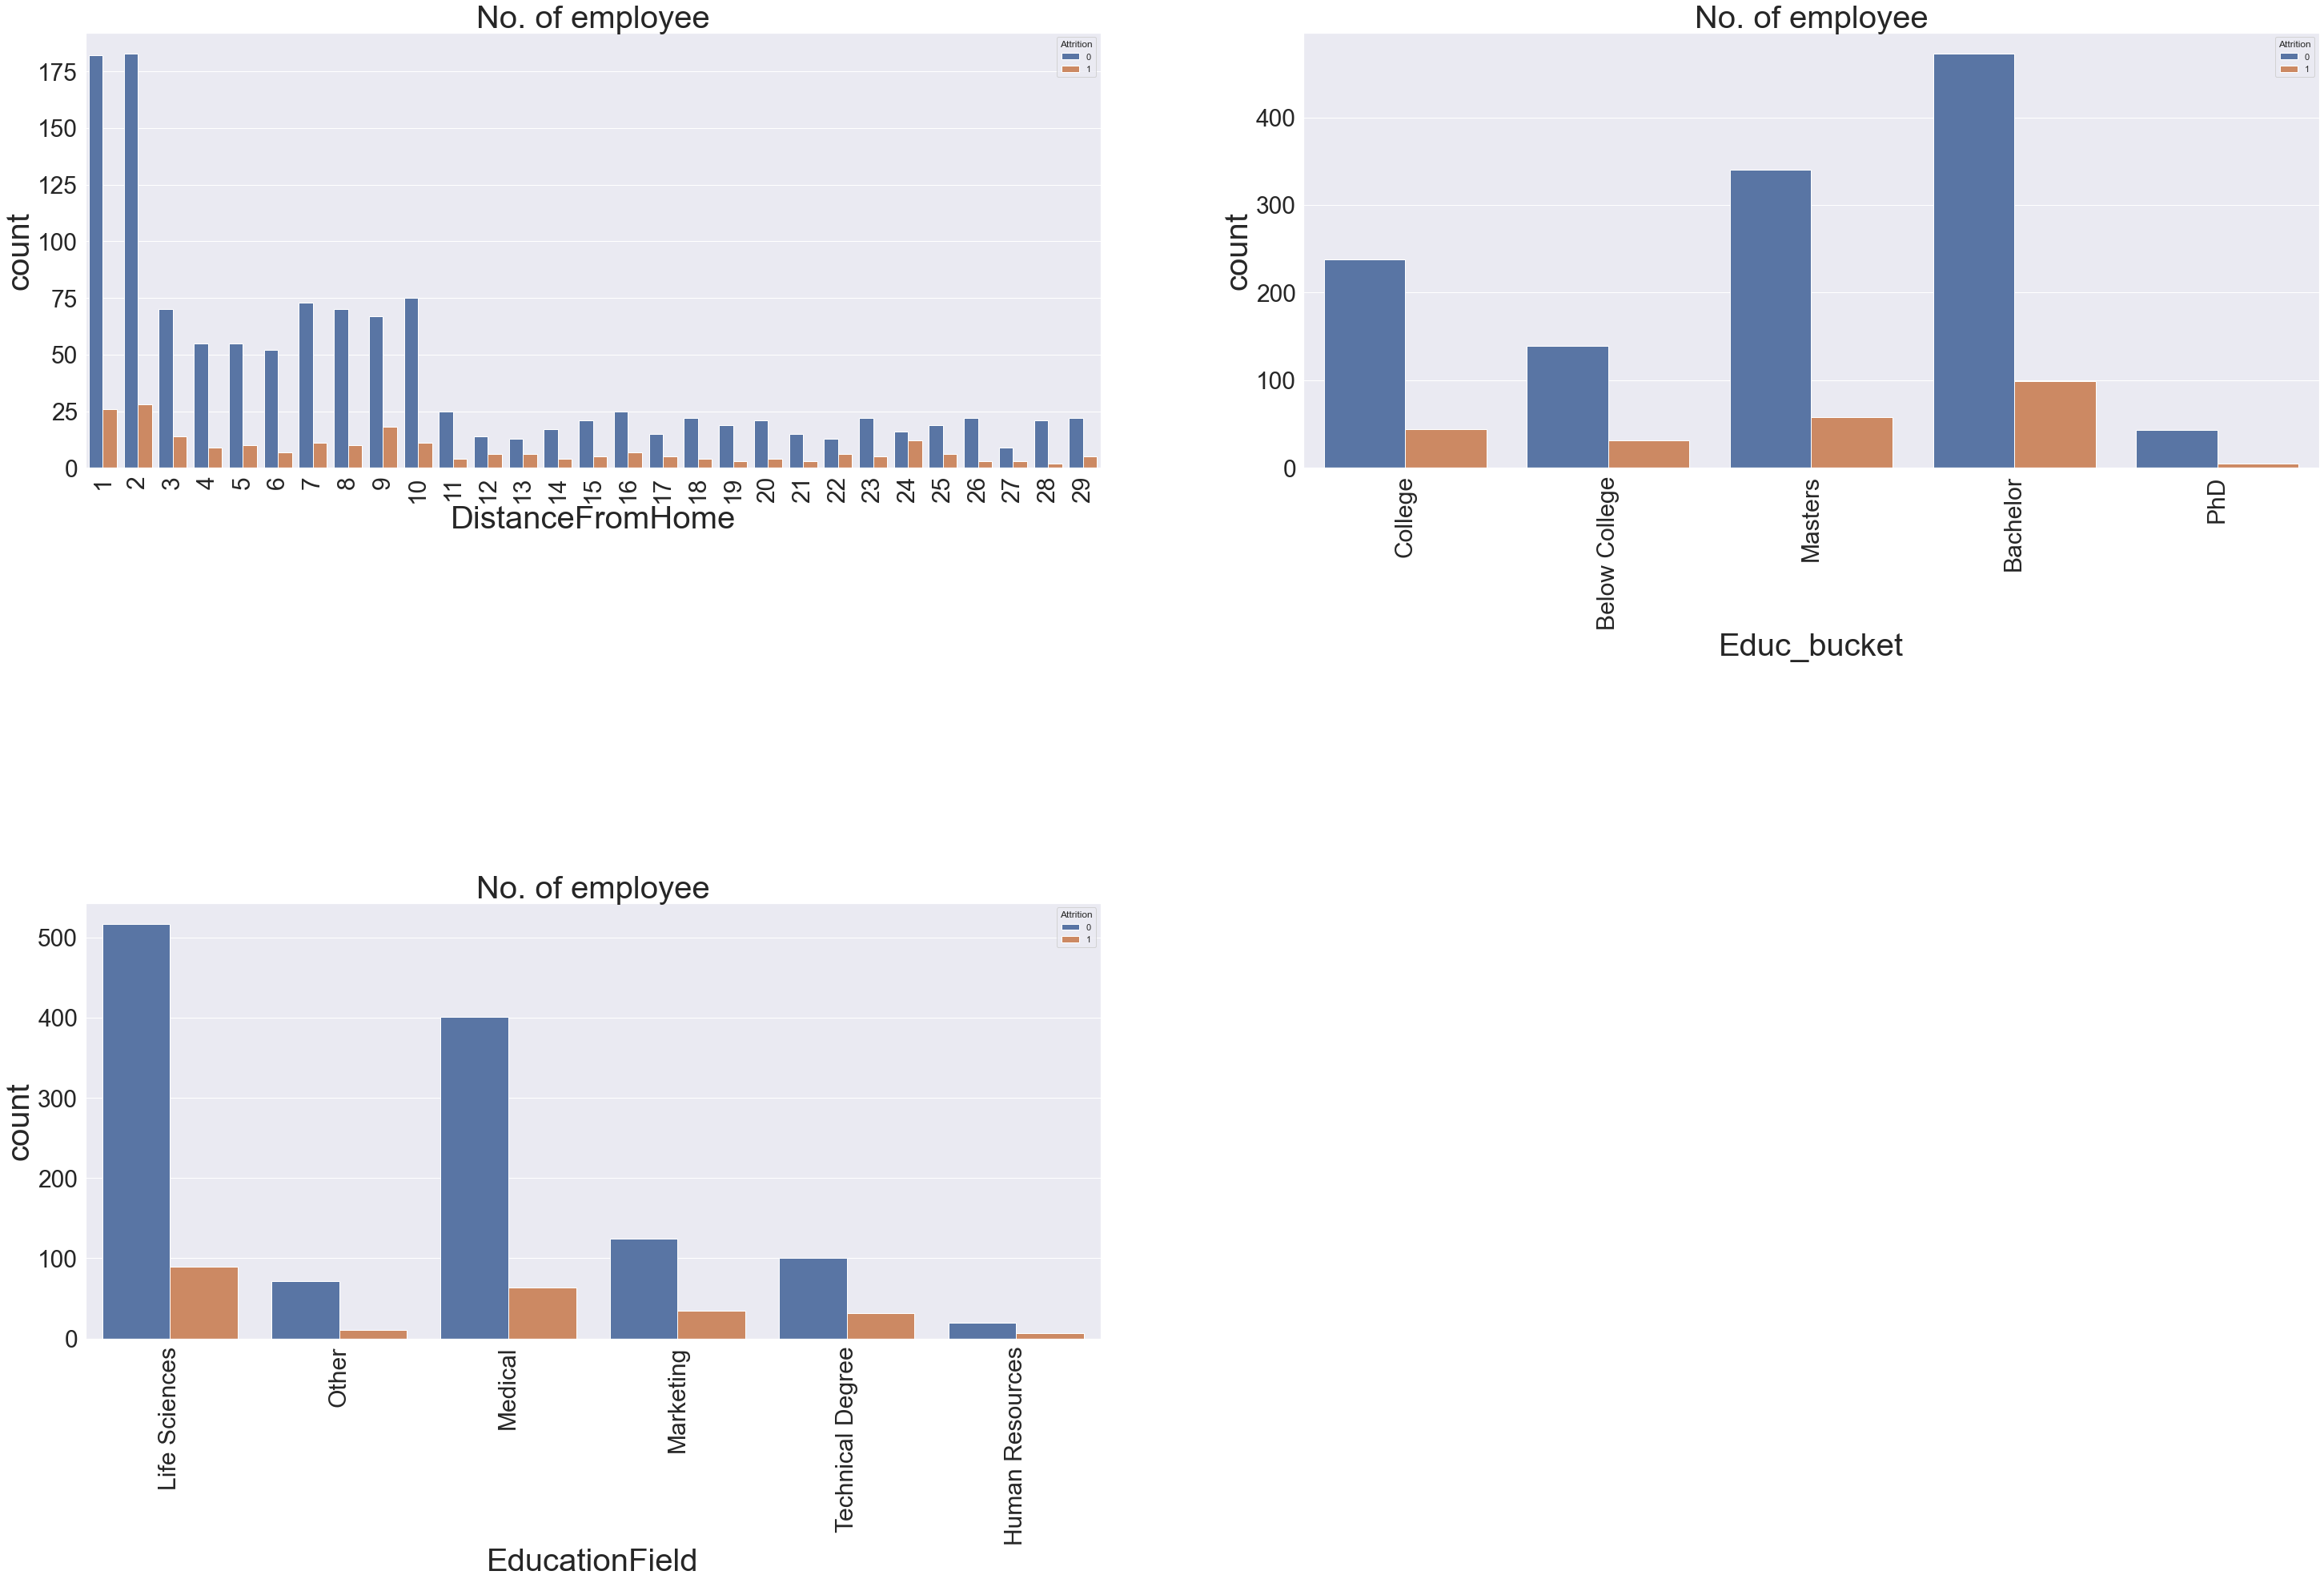

In [922]:
fig=plt.subplots(figsize=(50,50))
for i, j in enumerate(features2):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data_original, hue='Attrition')
    plt.xticks(rotation=90, fontsize = 30)
    plt.yticks(rotation=00, fontsize = 30)
    plt.xlabel(j, fontsize=40)
    plt.ylabel('count', fontsize=40)
    plt.title("No. of employee", fontsize=40)

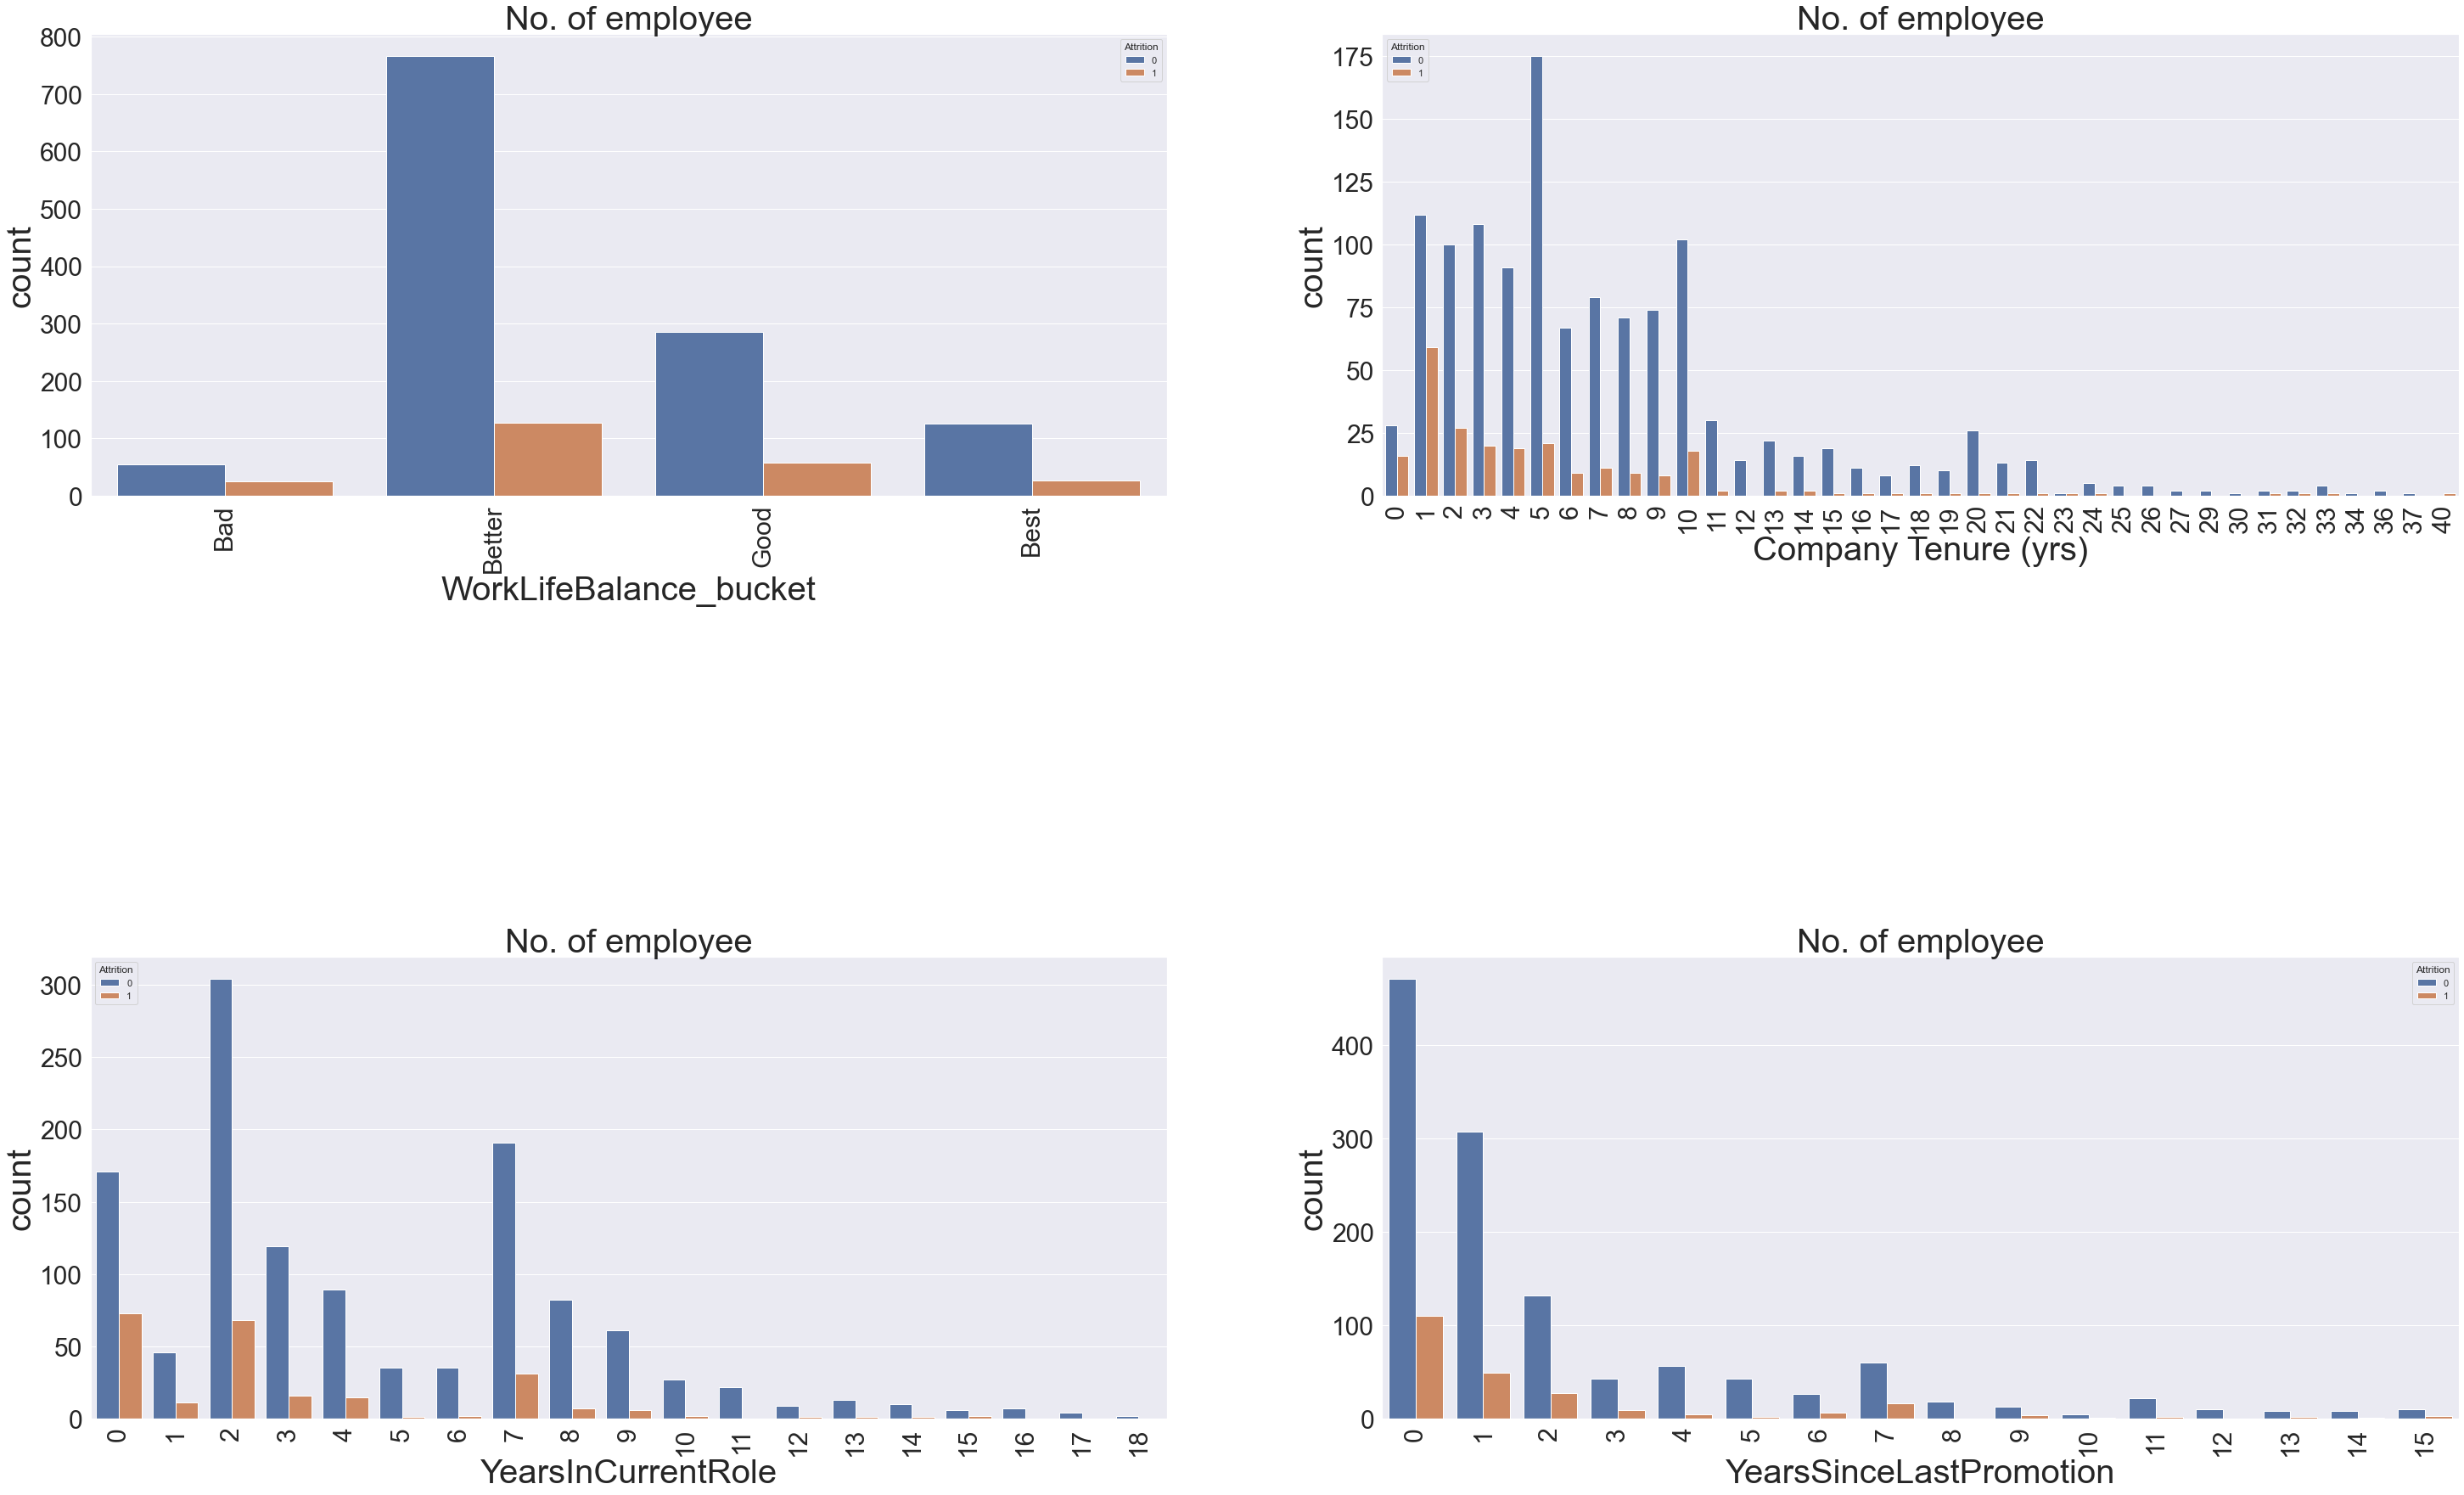

In [923]:
fig=plt.subplots(figsize=(50,50))
for i, j in enumerate(features3):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data_original, hue='Attrition')
    plt.xticks(rotation=90, fontsize = 30)
    plt.yticks(rotation=00, fontsize = 30)
    plt.xlabel(j, fontsize=40)
    plt.ylabel('count', fontsize=40)
    plt.title("No. of employee", fontsize=40)

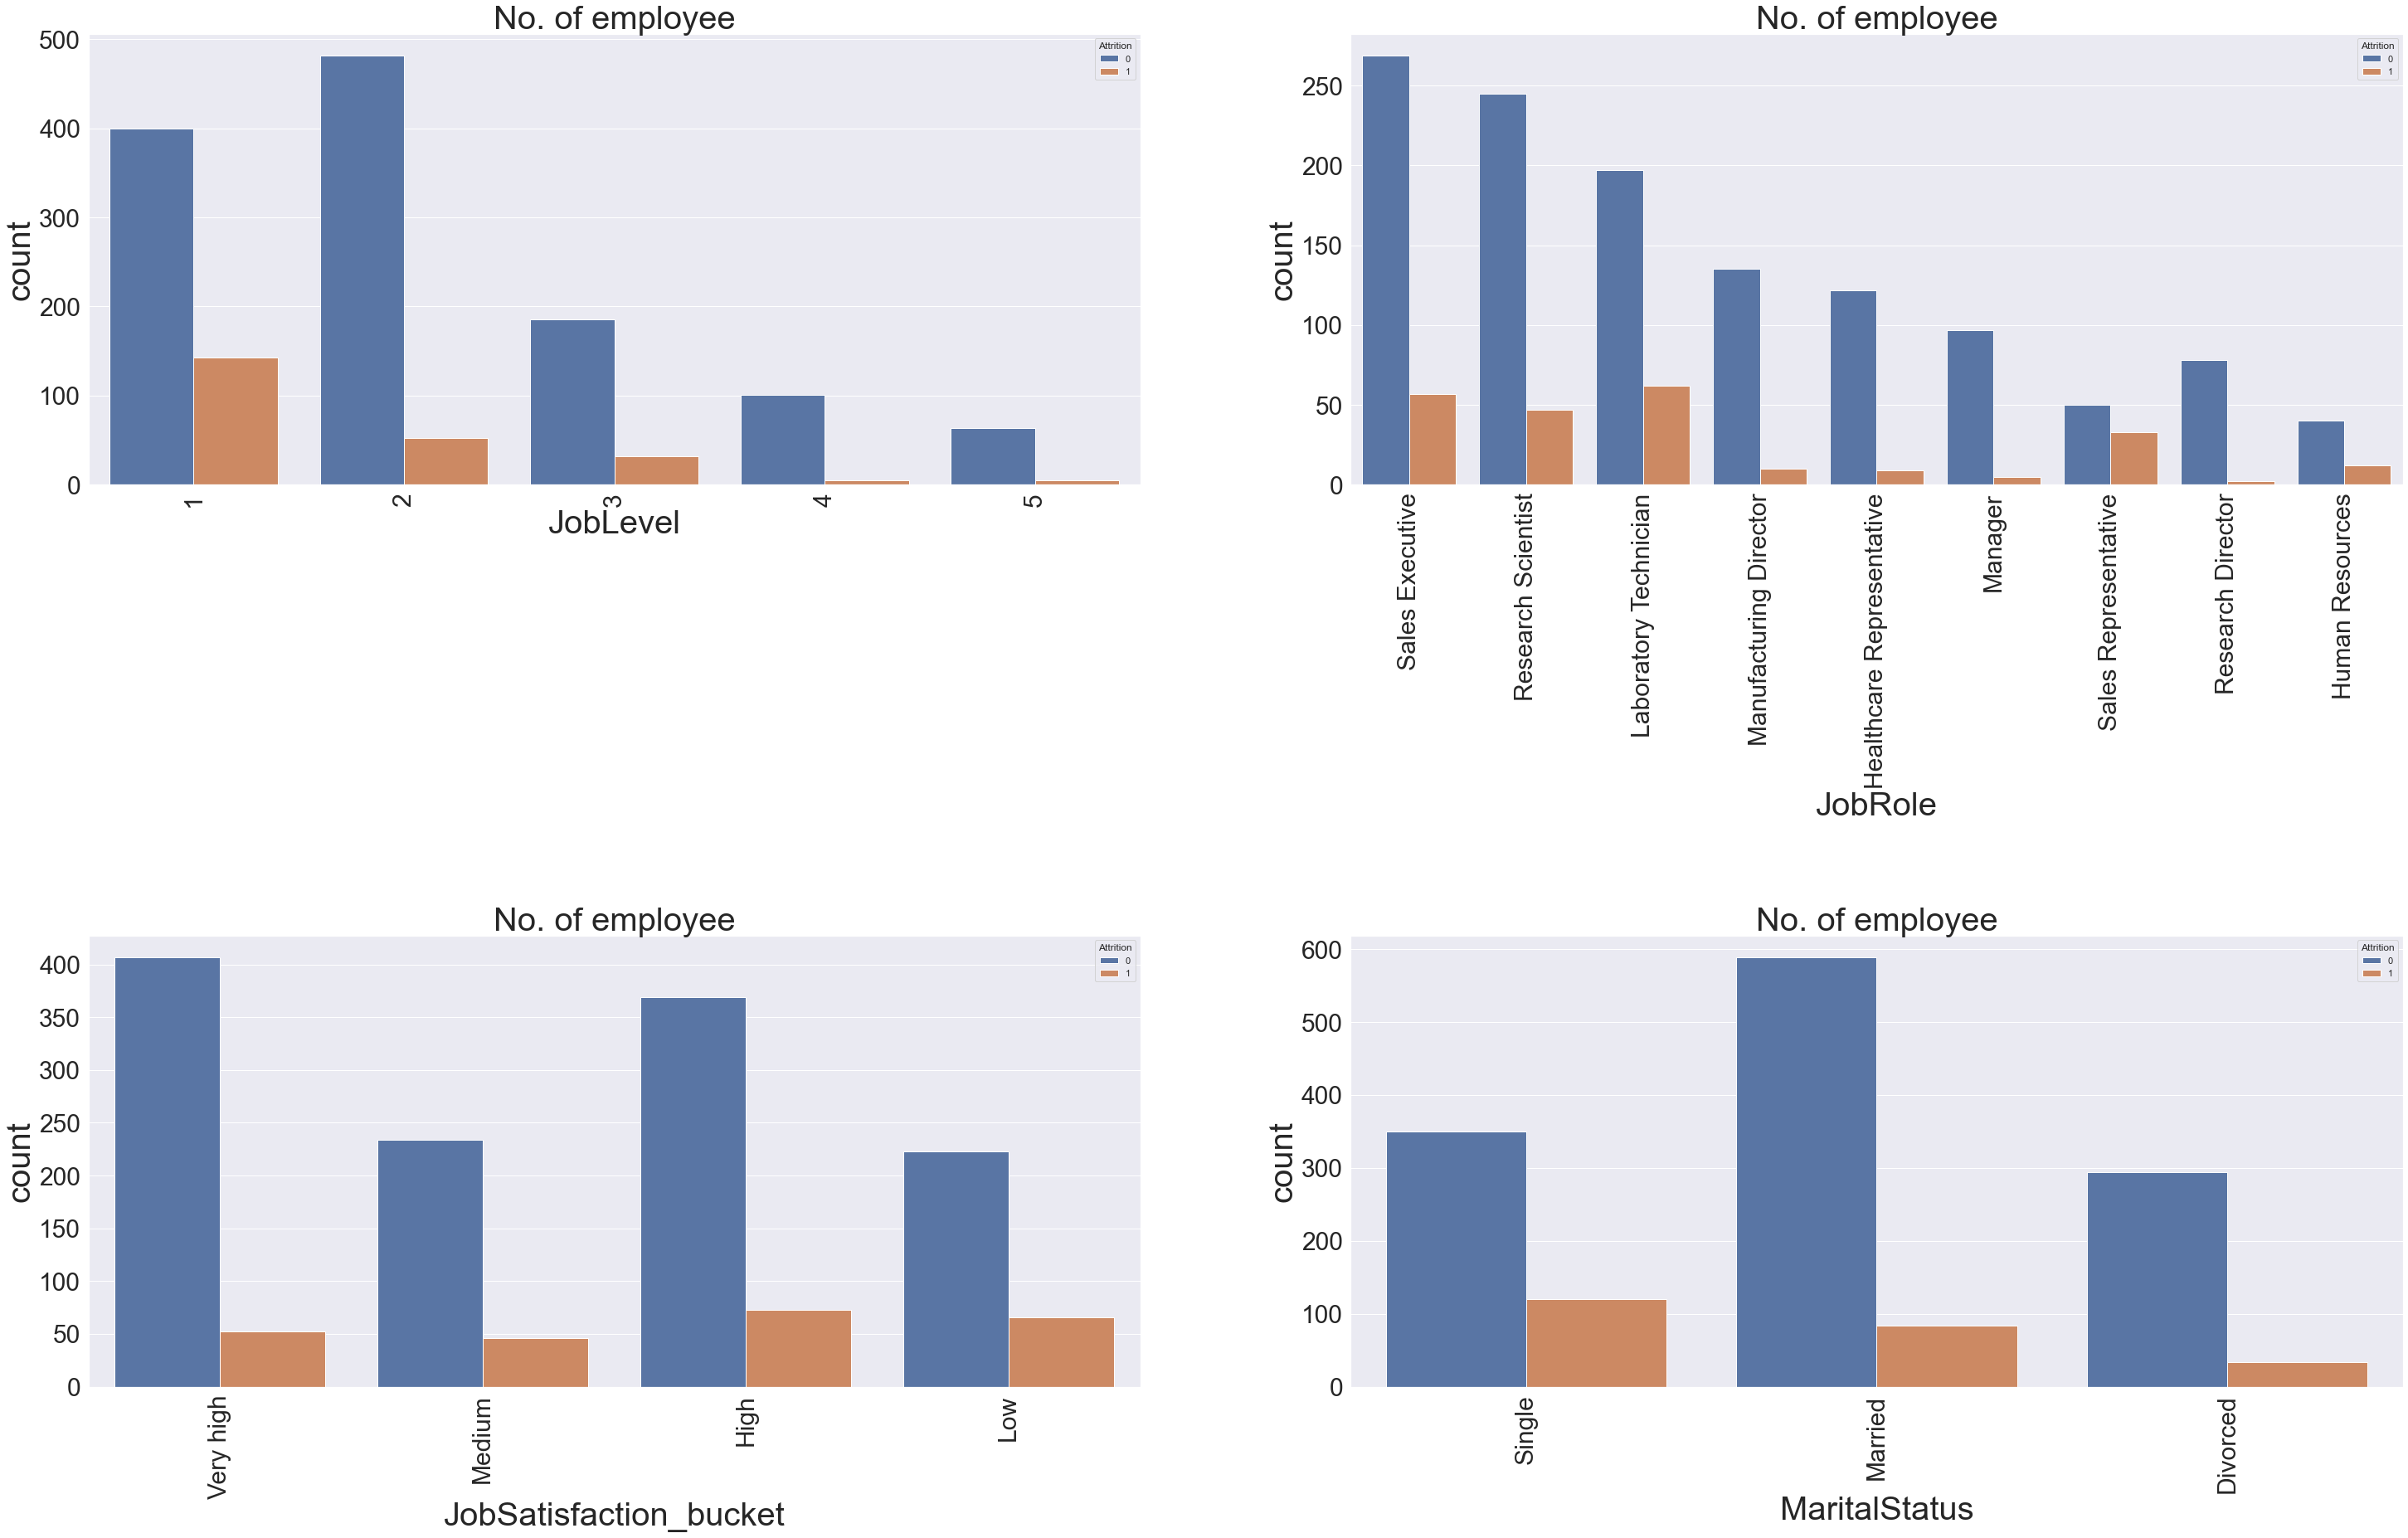

In [924]:
fig=plt.subplots(figsize=(50,50))
for i, j in enumerate(features4):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data_original, hue='Attrition')
    plt.xticks(rotation=90, fontsize = 30)
    plt.yticks(rotation=00, fontsize = 30)
    plt.xlabel(j, fontsize=40)
    plt.ylabel('count', fontsize=40)
    plt.title("No. of employee", fontsize=40)

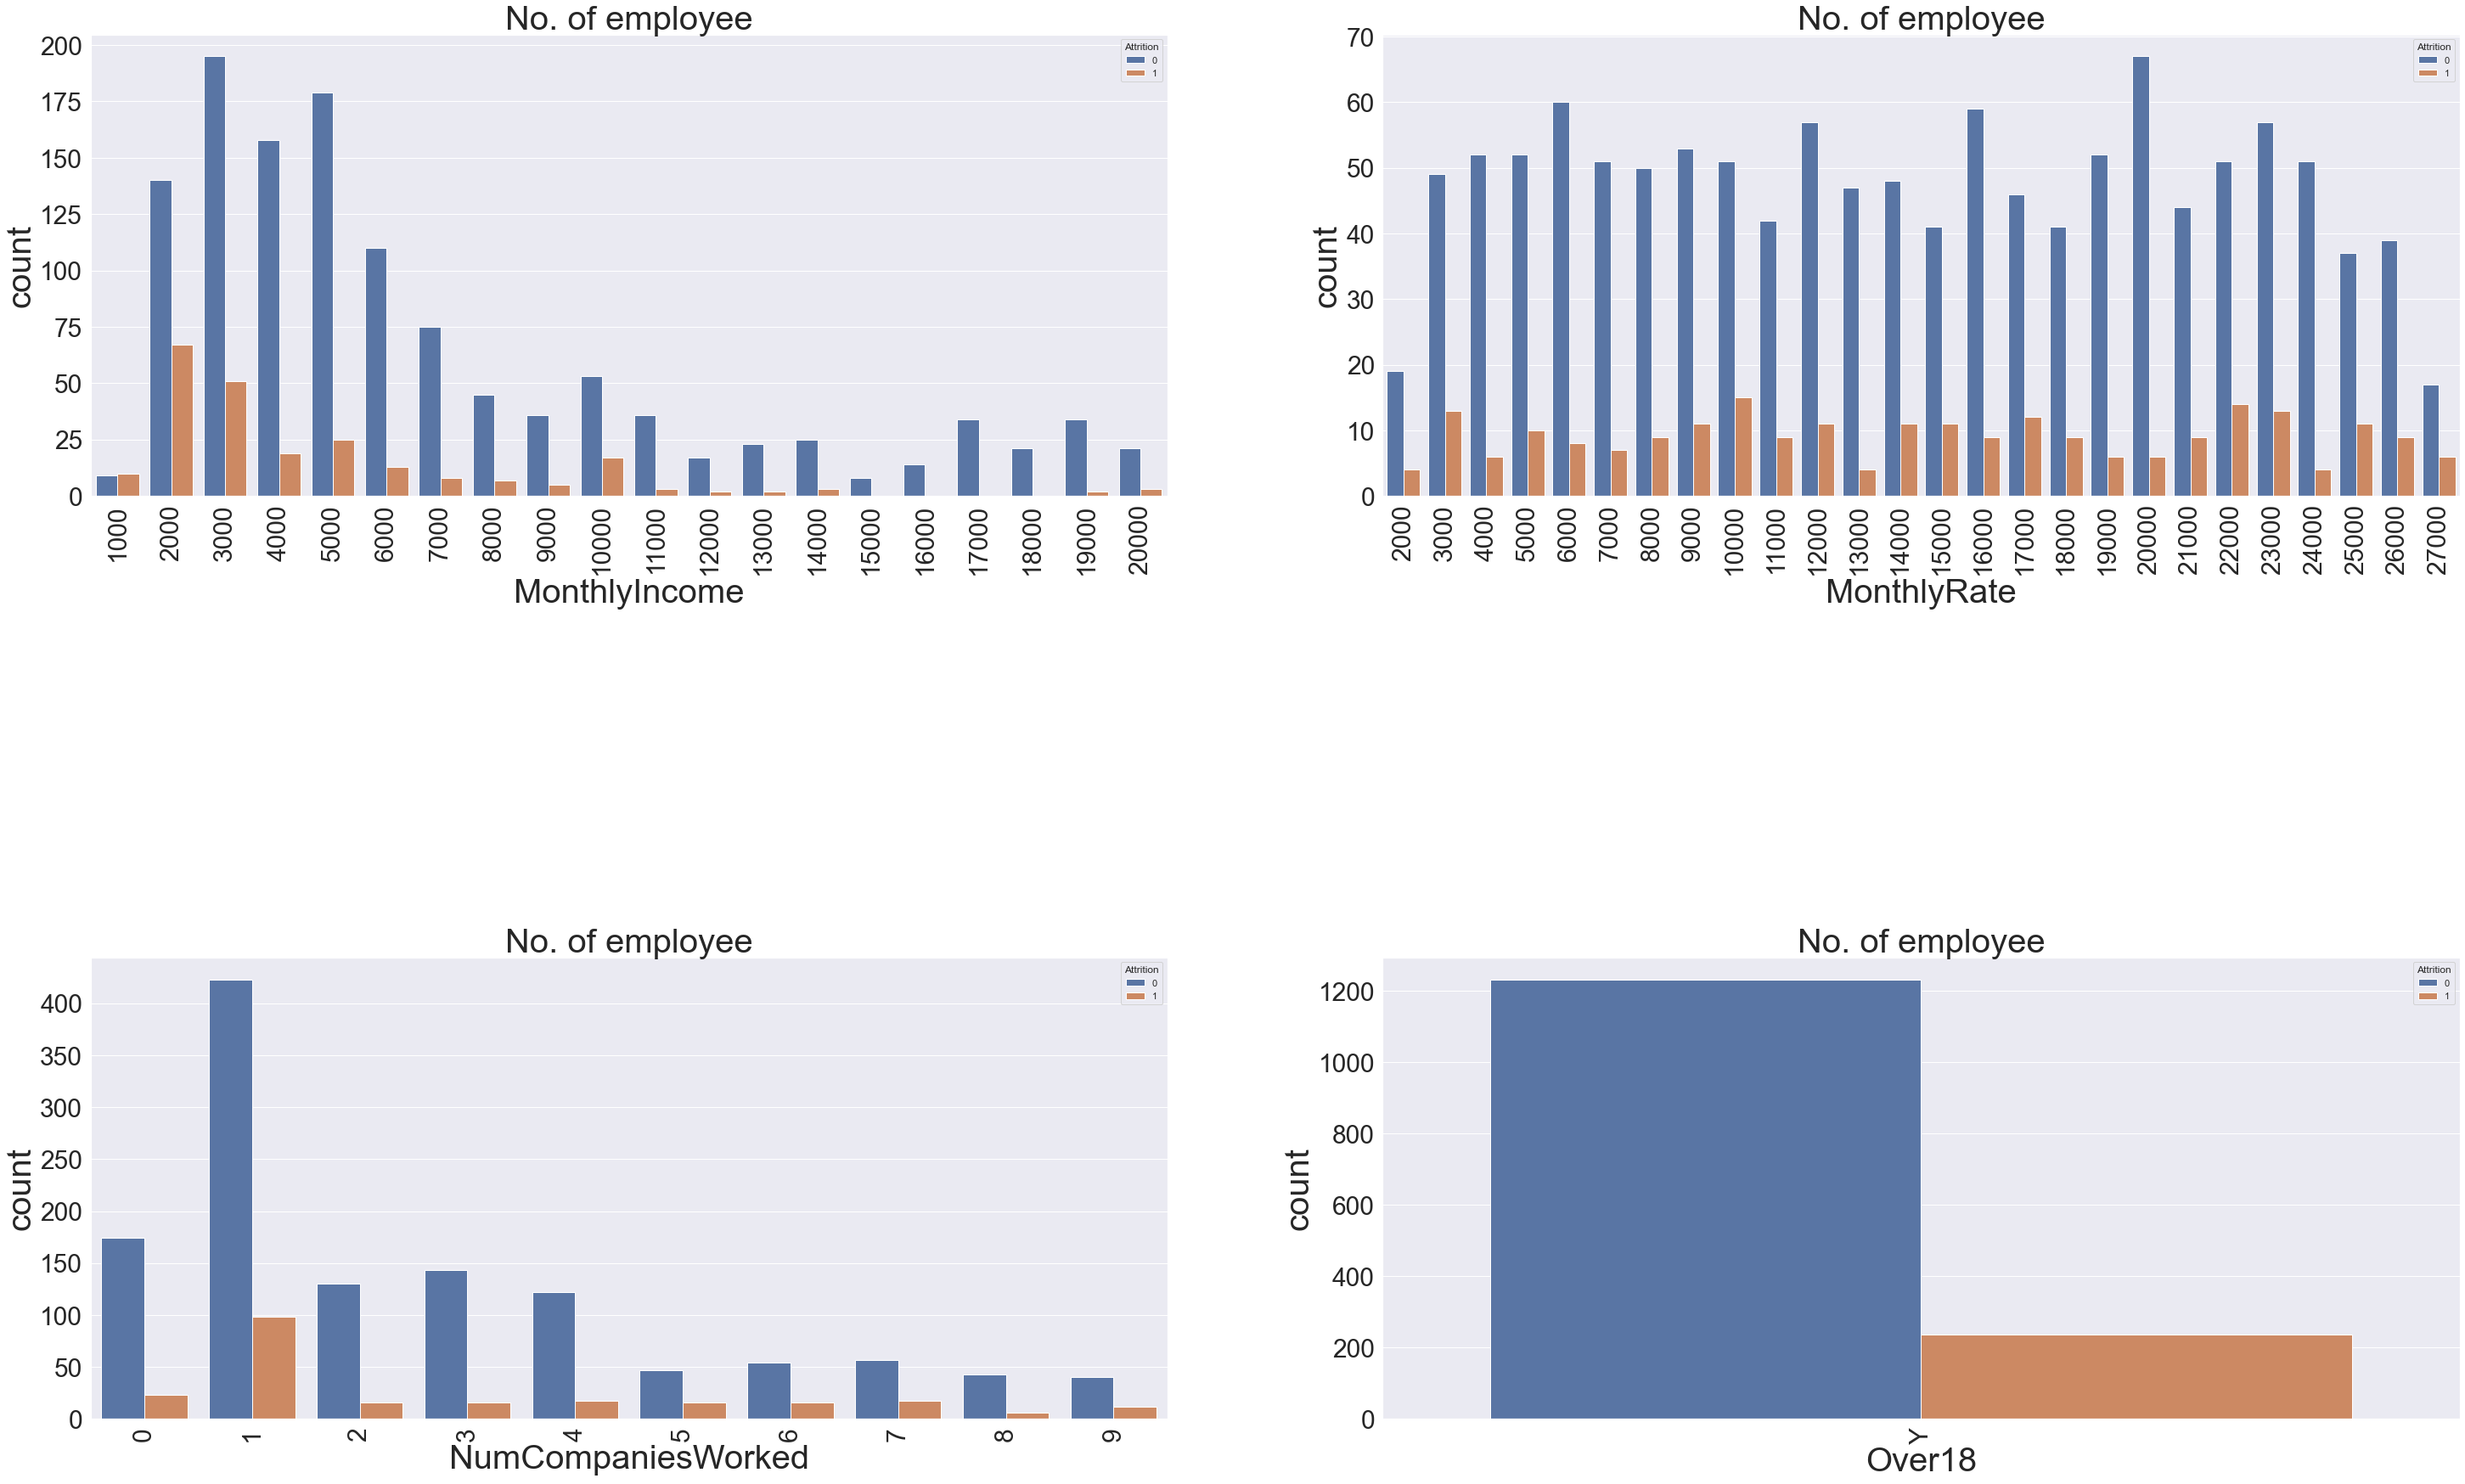

In [925]:
fig=plt.subplots(figsize=(50,50))
for i, j in enumerate(features5):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data_original, hue='Attrition')
    plt.xticks(rotation=90, fontsize = 30)
    plt.yticks(rotation=00, fontsize = 30)
    plt.xlabel(j, fontsize=40)
    plt.ylabel('count', fontsize=40)
    plt.title("No. of employee", fontsize=40)

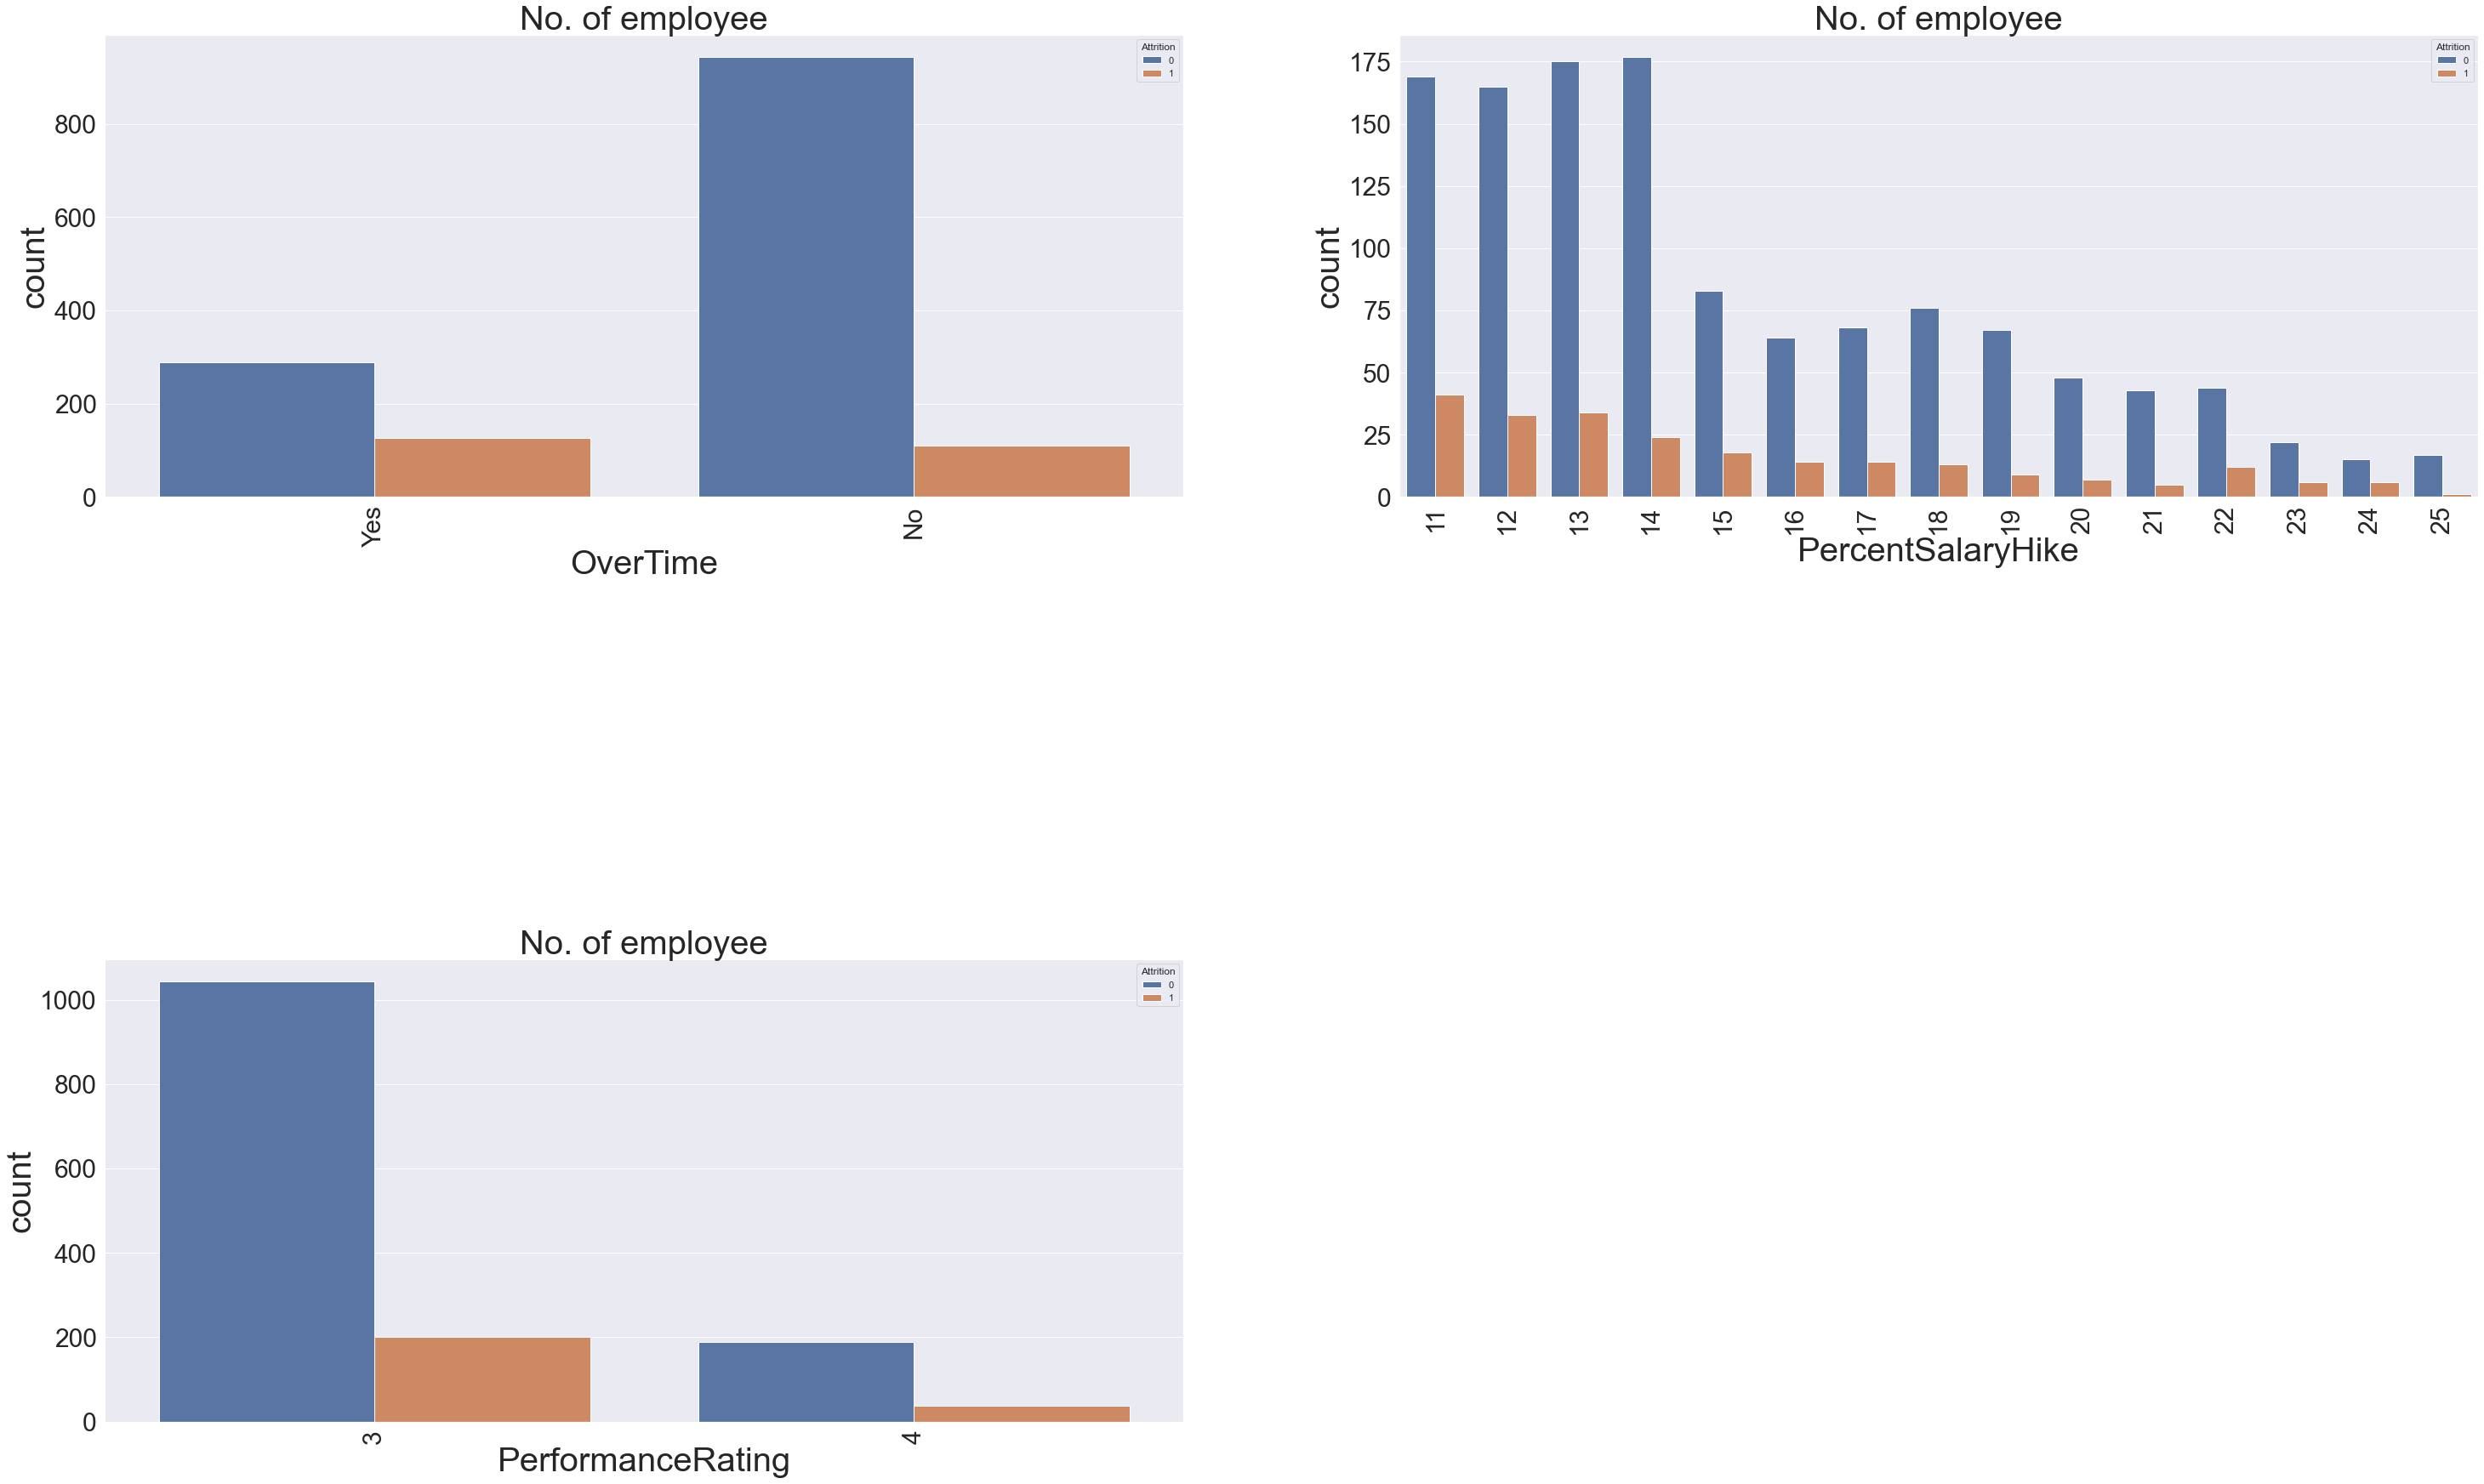

In [926]:
fig=plt.subplots(figsize=(50,50))
for i, j in enumerate(features6):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data_original, hue='Attrition')
    plt.xticks(rotation=90, fontsize = 30)
    plt.yticks(rotation=00, fontsize = 30)
    plt.xlabel(j, fontsize=40)
    plt.ylabel('count', fontsize=40)
    plt.title("No. of employee", fontsize=40)

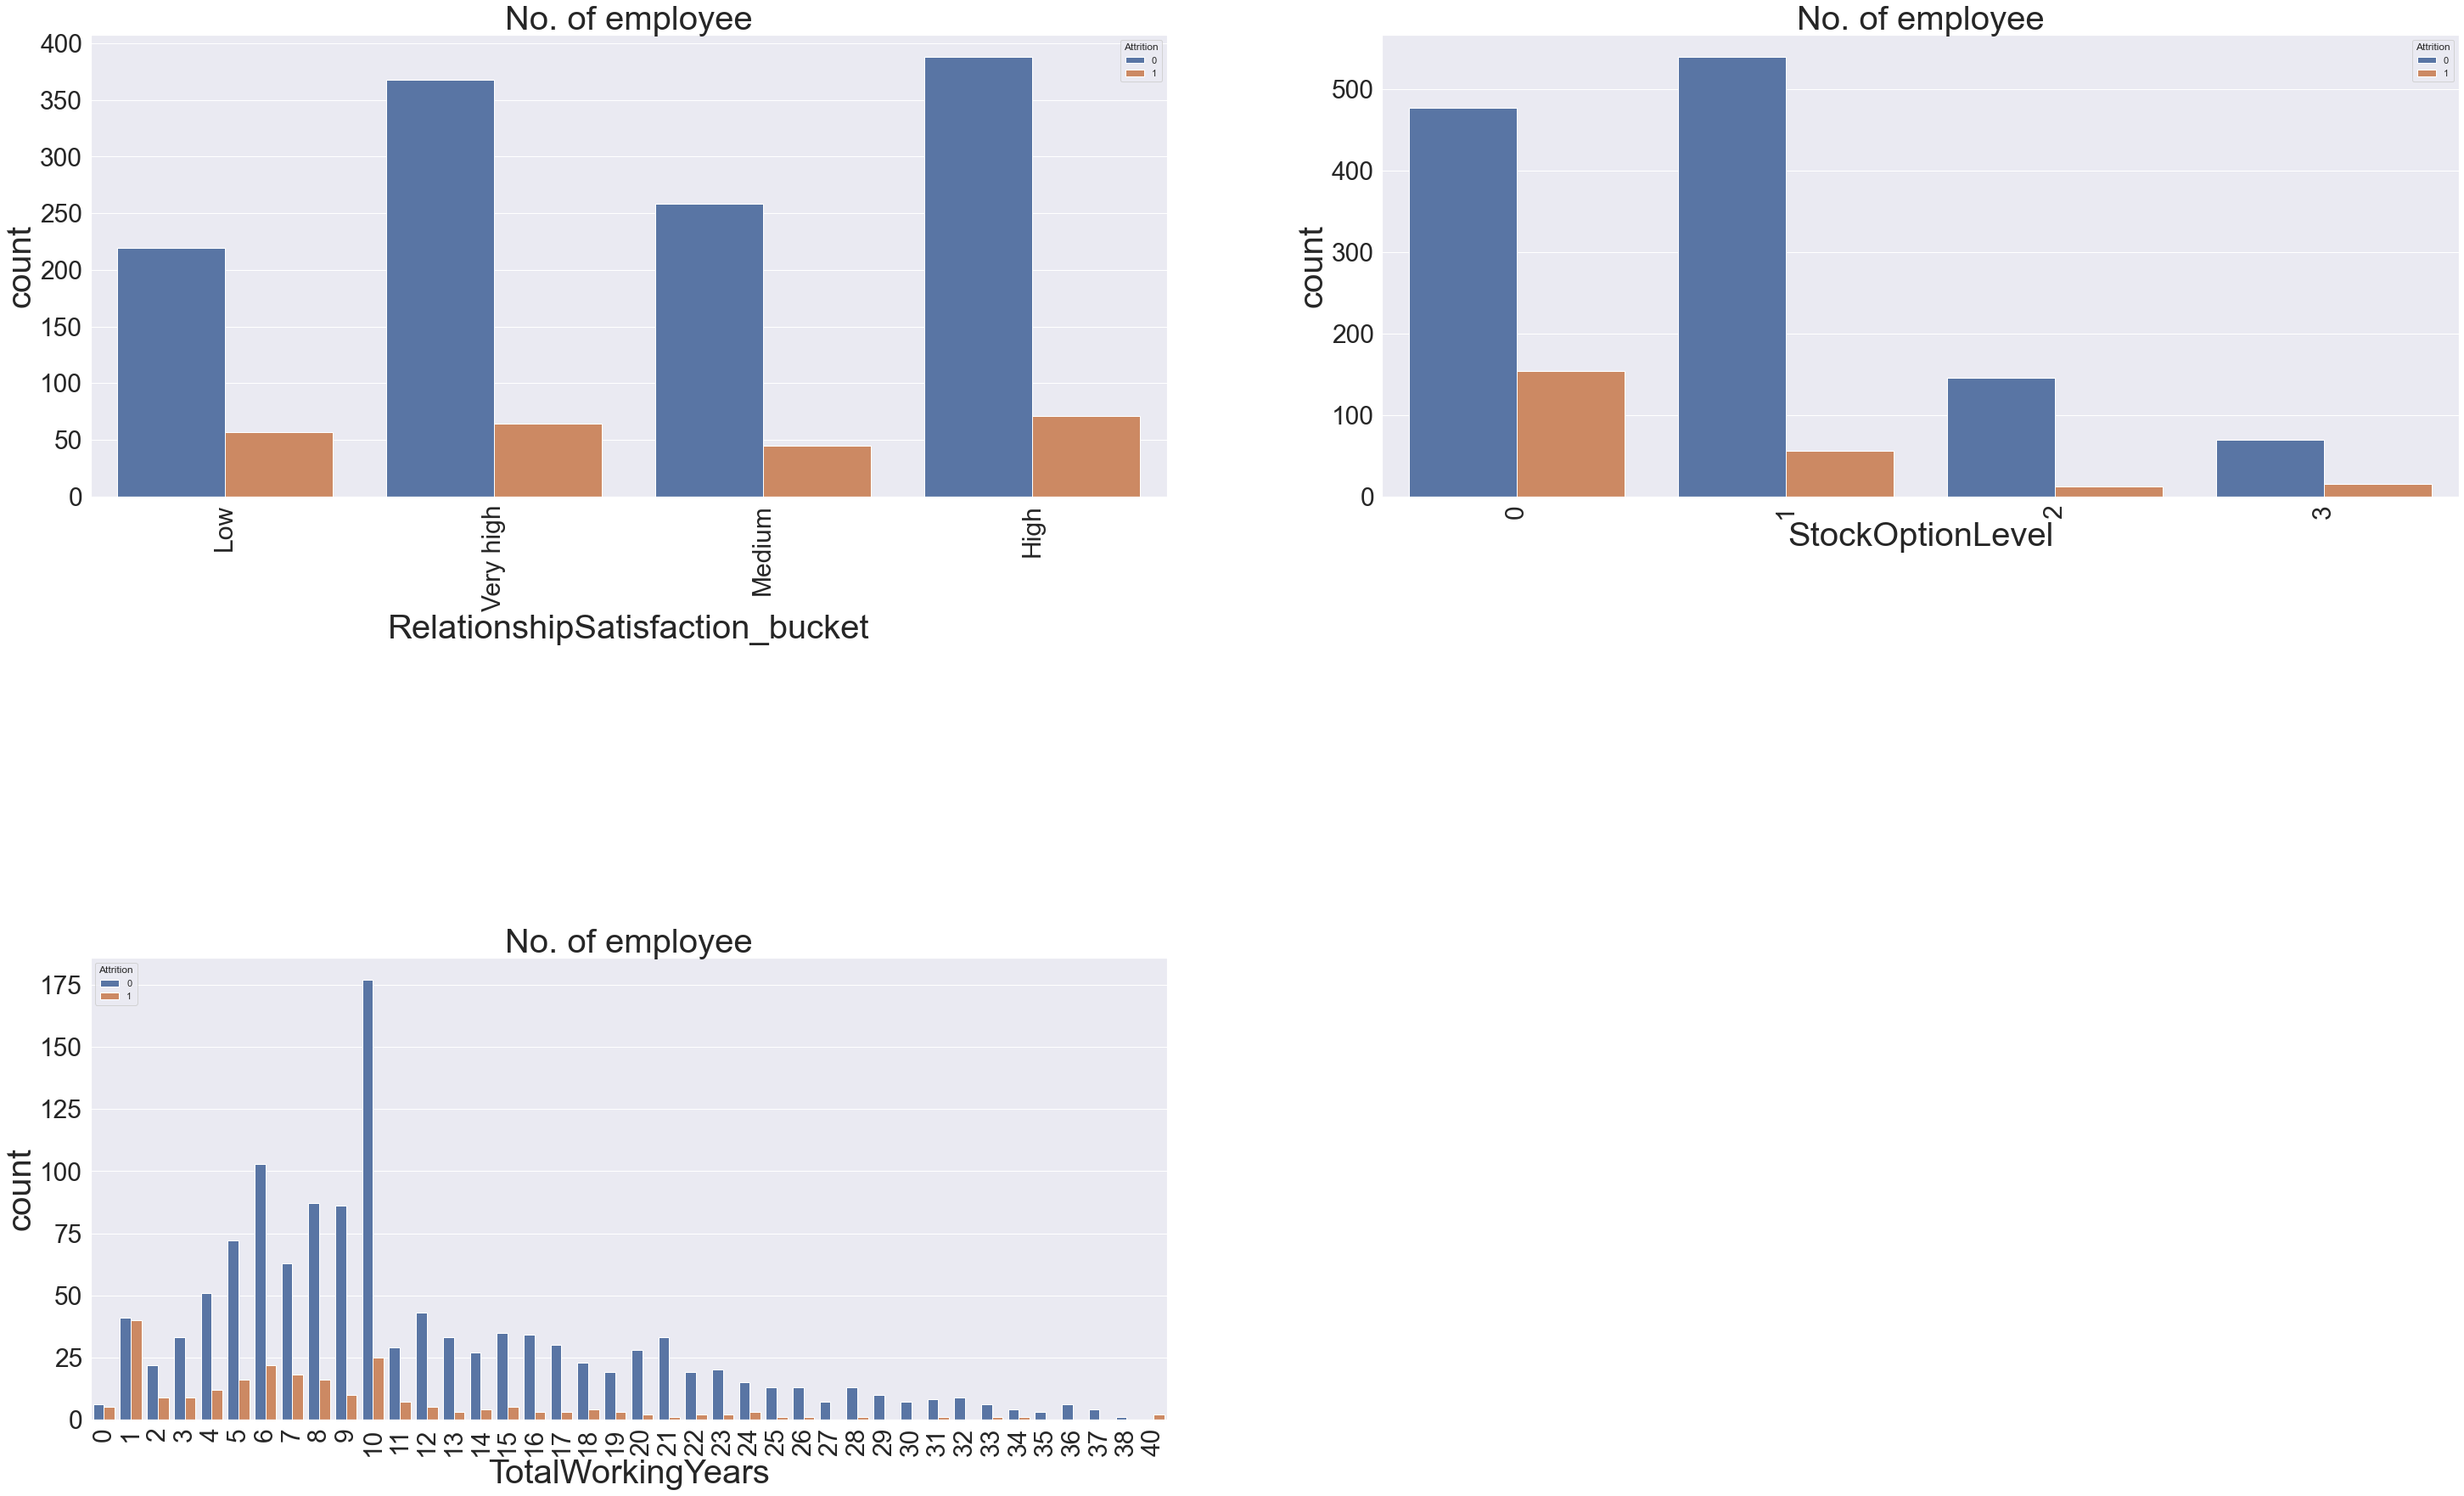

In [927]:
fig=plt.subplots(figsize=(50,50))
for i, j in enumerate(features7):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data_original, hue='Attrition')
    plt.xticks(rotation=90, fontsize = 30)
    plt.yticks(rotation=00, fontsize = 30)
    plt.xlabel(j, fontsize=40)
    plt.ylabel('count', fontsize=40)
    plt.title("No. of employee", fontsize=40)

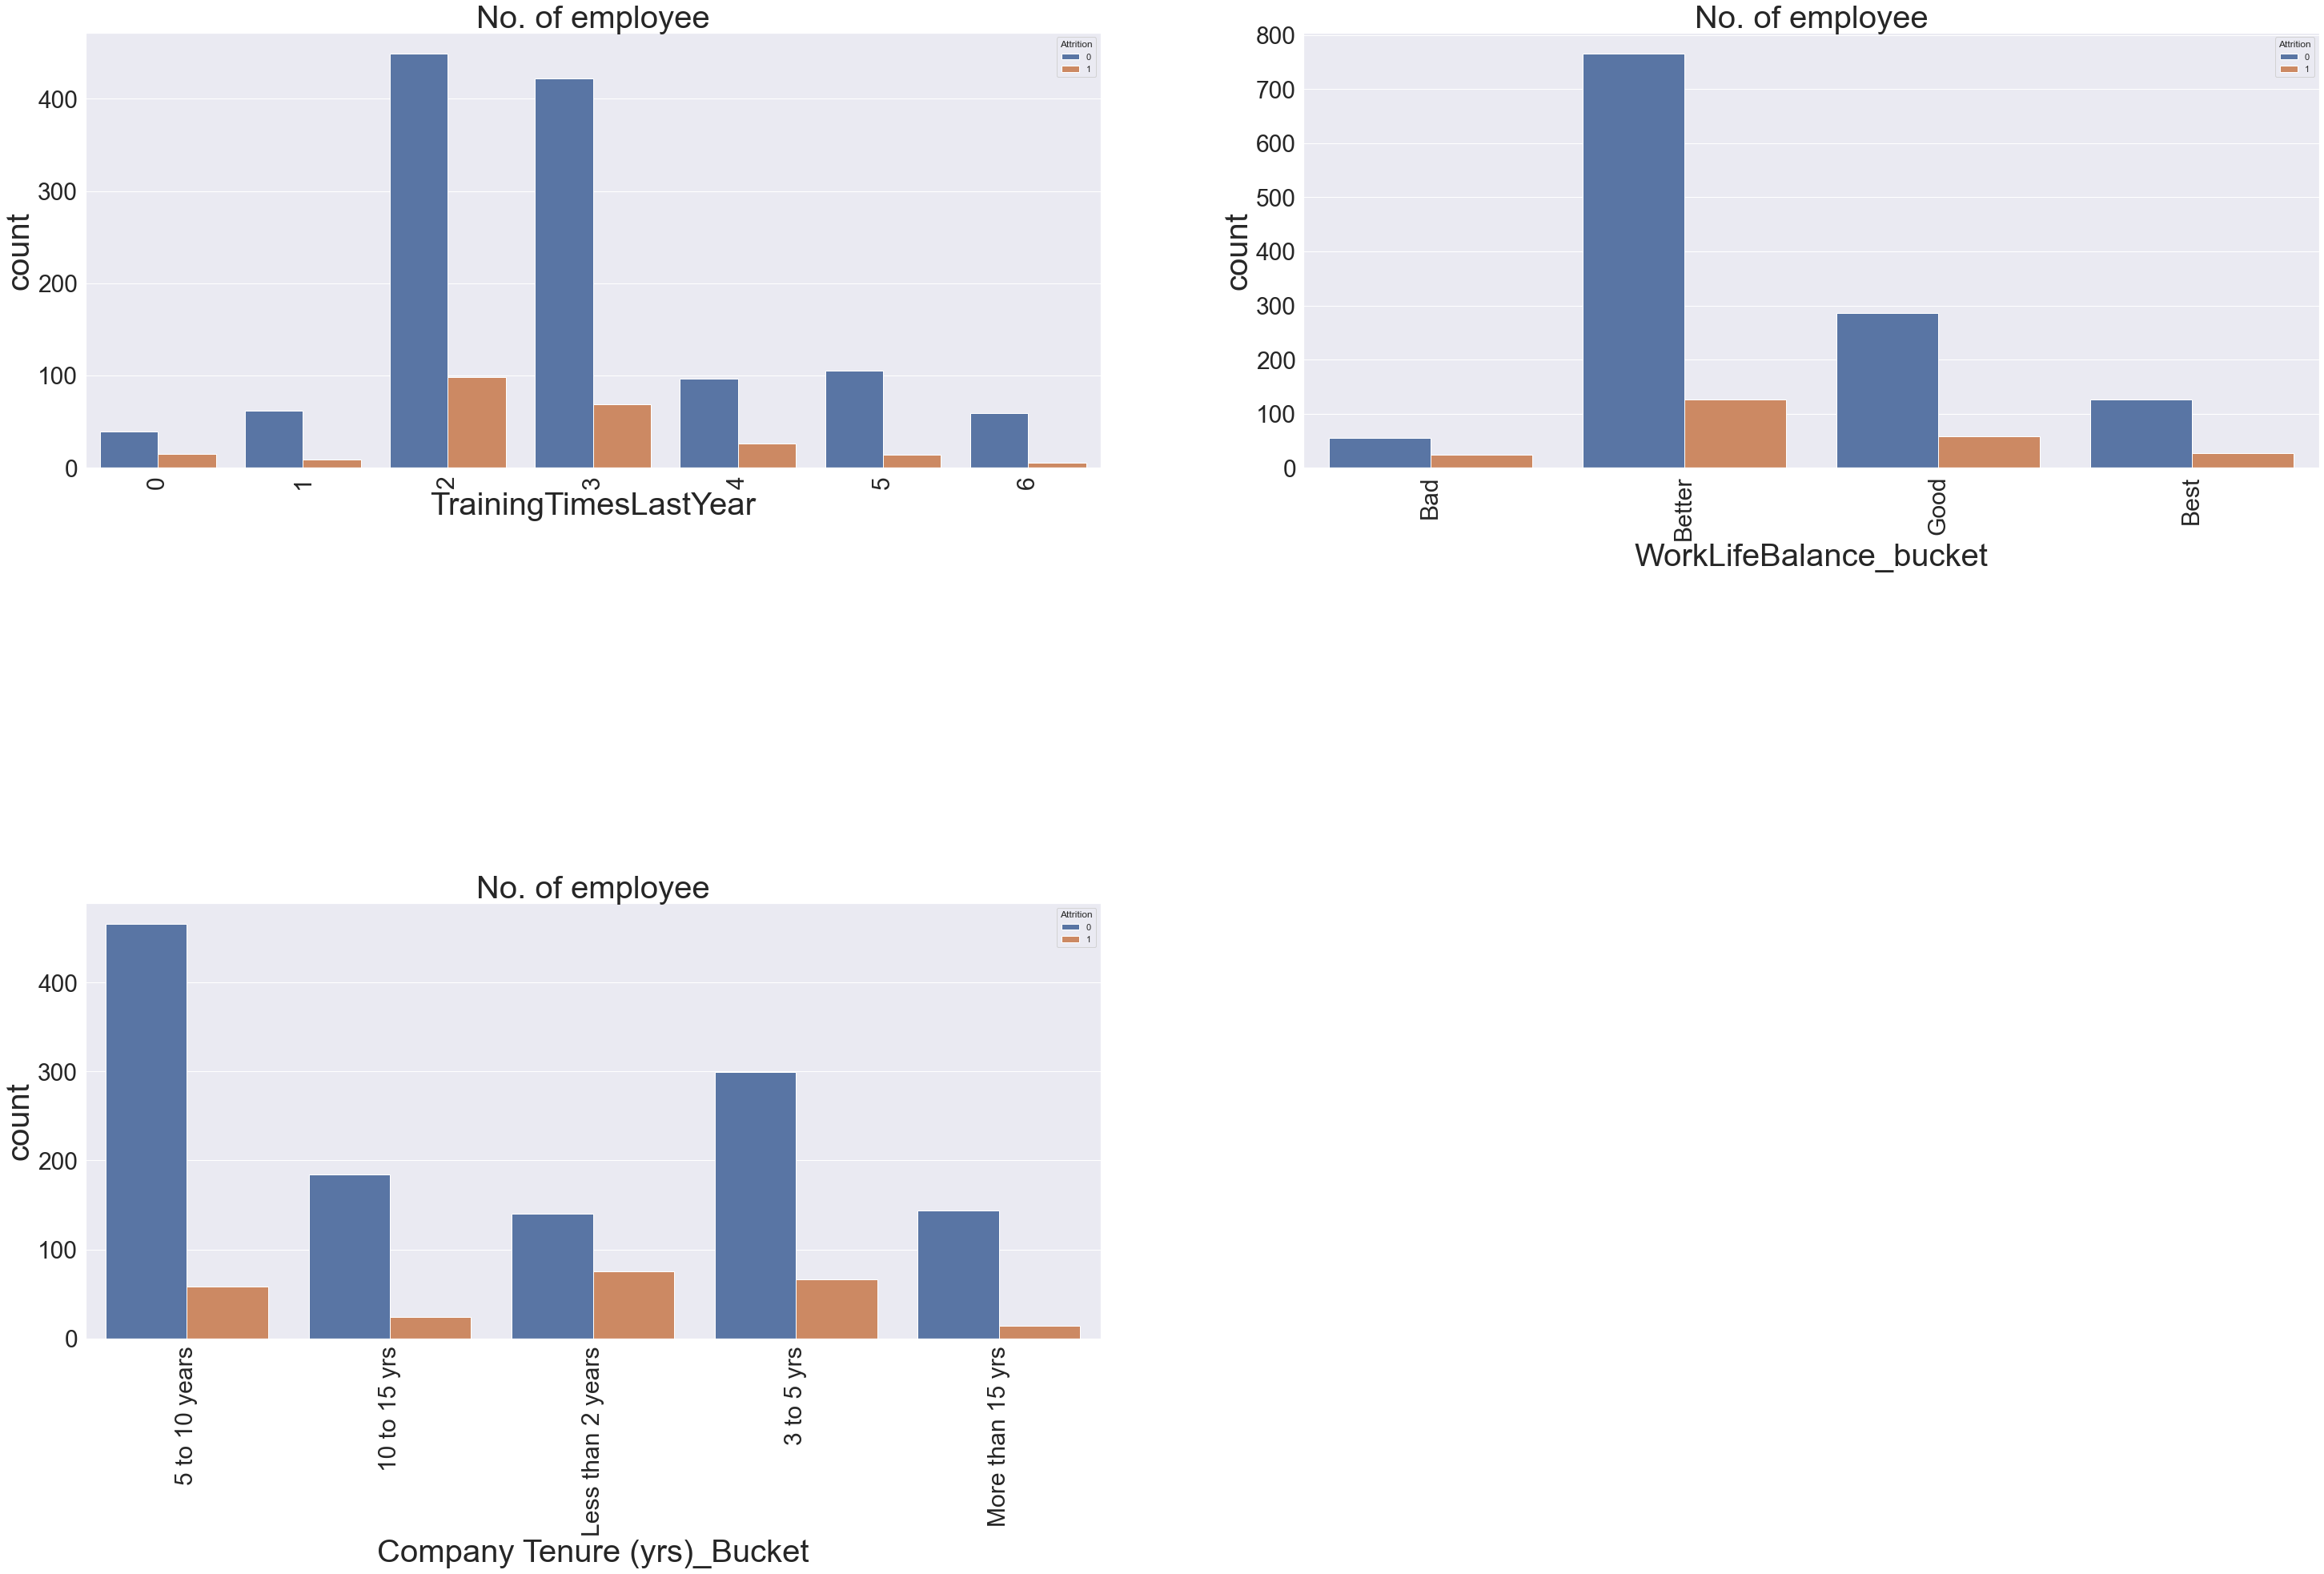

In [928]:
fig=plt.subplots(figsize=(50,50))
for i, j in enumerate(features8):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data_original, hue='Attrition')
    plt.xticks(rotation=90, fontsize = 30)
    plt.yticks(rotation=00, fontsize = 30)
    plt.xlabel(j, fontsize=40)
    plt.ylabel('count', fontsize=40)
    plt.title("No. of employee", fontsize=40)

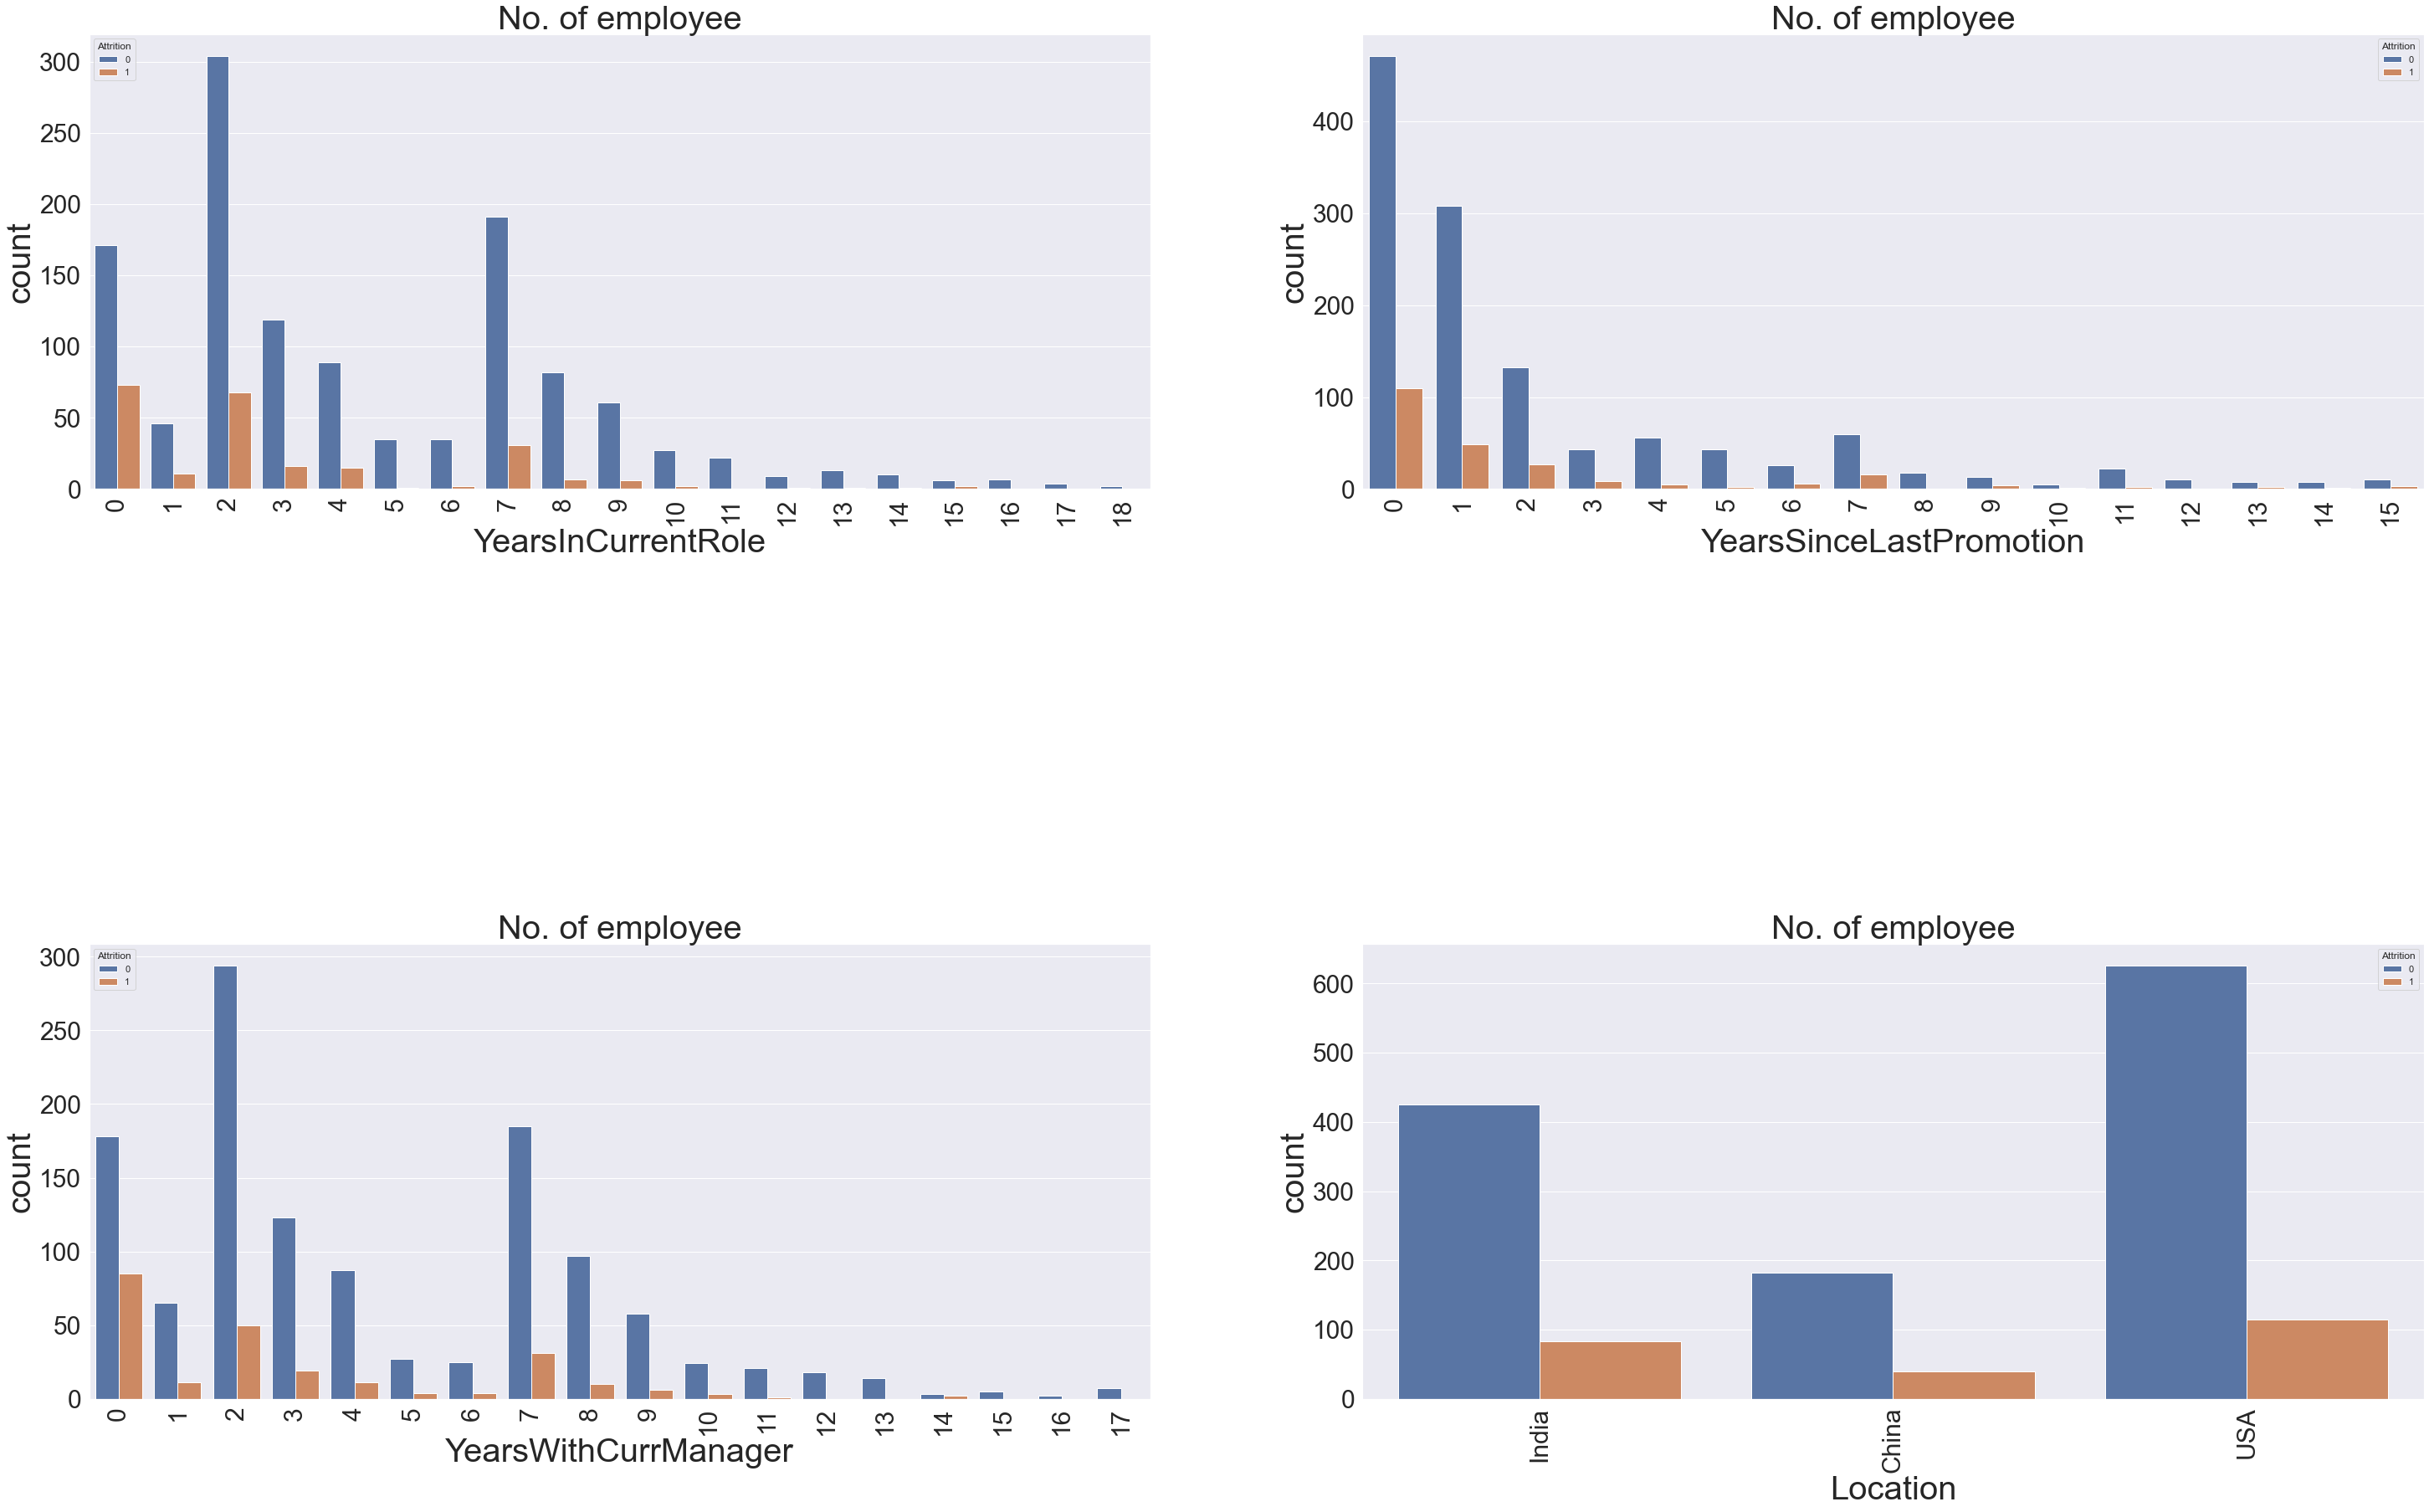

In [929]:
fig=plt.subplots(figsize=(50,50))
for i, j in enumerate(features9):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data_original, hue='Attrition')
    plt.xticks(rotation=90, fontsize = 30)
    plt.yticks(rotation=00, fontsize = 30)
    plt.xlabel(j, fontsize=40)
    plt.ylabel('count', fontsize=40)
    plt.title("No. of employee", fontsize=40)

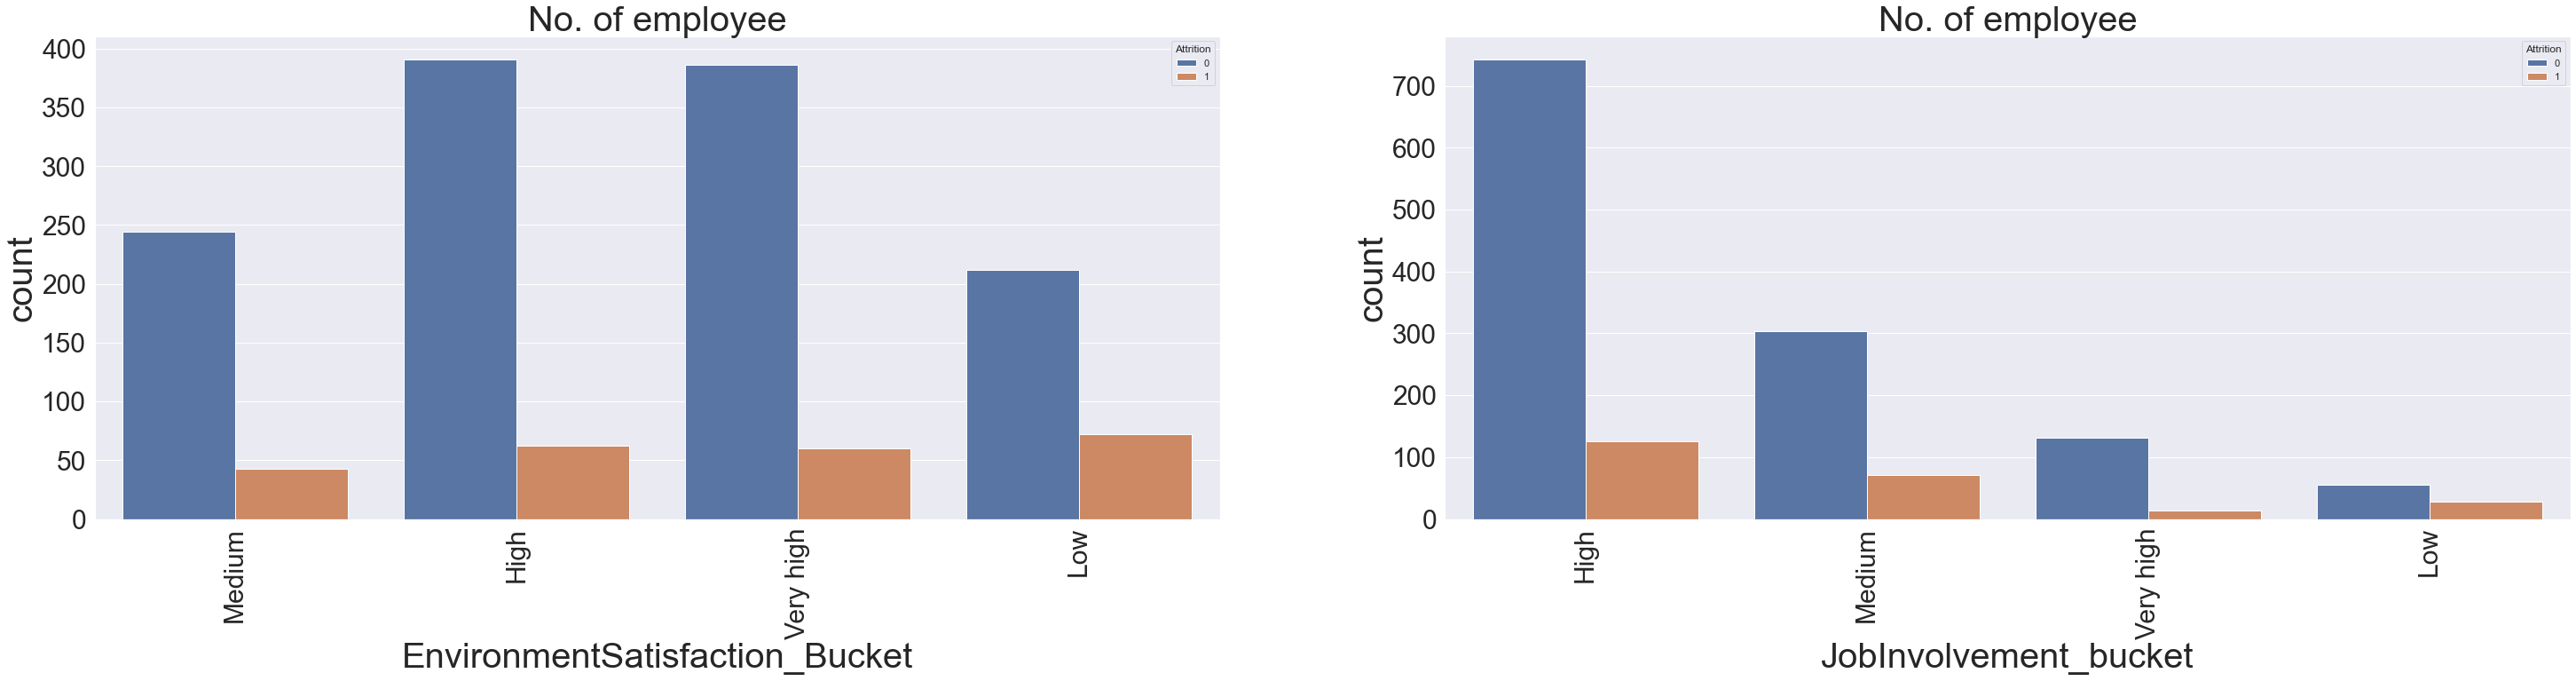

In [930]:
fig=plt.subplots(figsize=(50,50))
for i, j in enumerate(features10):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data_original, hue='Attrition')
    plt.xticks(rotation=90, fontsize = 30)
    plt.yticks(rotation=00, fontsize = 30)
    plt.xlabel(j, fontsize=40)
    plt.ylabel('count', fontsize=40)
    plt.title("No. of employee", fontsize=40)